In [19]:
import os
import numpy as np
import qiskit as qiskit
import qiskit_superstaq as qss
from qiskit import *
from jaqalpaq.parser import parse_jaqal_string
from jaqalpaq import run
from jaqalpaq import emulator
from jaqalpaq.run import run_jaqal_file, run_jaqal_string, run_jaqal_batch, run_jaqal_circuit, frontend
from jaqalpaq.qsyntax.qsyntax import Q as Q_obj
from jaqalpaq.qsyntax import circuit
from jaqalpaq.core.algorithm import expand_subcircuits

from jaqalpaq.emulator.unitary import UnitarySerializedEmulator
emulator_backend = UnitarySerializedEmulator()

import matplotlib
from matplotlib import pyplot
import json

#provider = qss.SuperstaqProvider(api_key="api key here")
os.environ["REQUESTS_CA_BUNDLE"] = "/etc/ssl/certs/ca-certificates.crt"
token = "75d831b0b53761095c124375e9f12cb2297ca5ac0556e1e895a2800b8a617dc2"
os.environ["SUPERSTAQ_API_KEY"] = token
provider = qss.superstaq_provider.SuperstaqProvider(token)

In [20]:
#Imports for JAF and Emulator to Play Nice

import jaqalpaq.ipc.client
from jaqalpaq.generator import generate_jaqal_program
from jaqalpaq.core.algorithm.walkers import walk_circuit, discover_subcircuits
import json
def special_emit(circuit, overrides, a=[0]):
    """(internal) Generate Jaqal appropriate for running on the hardware."""
    jaqal = generate_jaqal_program(circuit)
    overrides = overrides or {}
    try:
        overrides["__index__"]
    except KeyError:
        starts = [start for (start, end) in discover_subcircuits(circuit)]
        overrides["__index__"] = [list(walk_circuit(circuit, starts))]
    jaqal = jaqal.replace("from qscout.v1.std usepulses *", "from Calibration_PulseDefinitions.SandboxPulses usepulses *")
    jaqal = "".join((jaqal, "\n// OVERRIDES: ", json.dumps(overrides), "\n"))

    print(a[0])
    a[0] += 1
    print(jaqal)
    return jaqal
jaqalpaq.ipc.client.emit_jaqal_for_hardware = special_emit

In [21]:
#Original Code
#This uses g = 4, k = 2, N = 3

#Timesteps [0.01,3,51]
#orig_code = ['\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.03992811567827717\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.03992811567827717\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 0.07985623135655434\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.0199680375022683\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.0199680375022683\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.0399360750045366\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.019972019546281142\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.019972019546281142\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.039944039092562285\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.27417855282171394\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.27417855282171394\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 0.5483571056434279\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.13839594630377153\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.13839594630377153\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.27679189260754306\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.13974070786496443\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.13974070786496443\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.27948141572992885\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.4957751138559149\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.4957751138559149\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 0.9915502277118298\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.255875971956359\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.255875971956359\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.511751943912718\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.2646904186569138\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.2646904186569138\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.5293808373138276\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.6975796983884295\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.6975796983884295\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.395159396776859\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.3721914399128834\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.3721914399128834\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.7443828798257668\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.40105128636217025\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.40105128636217025\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.8021025727243405\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.8718804731042511\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.8718804731042511\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.7437609462085022\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4845728349703279\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4845728349703279\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.9691456699406558\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.554404382506069\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.554404382506069\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.108808765012138\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -1.0106136327475157\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -1.0106136327475157\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 2.0212272654950314\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.586216526641848\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.586216526641848\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.172433053283696\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.7262758067504644\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.7262758067504644\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.4525516135009289\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -1.106241404649161\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -1.106241404649161\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 2.212482809298322\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.6654424281624345\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.6654424281624345\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.330884856324869\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.9024743728021694\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.9024743728021694\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.8049487456043387\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -1.1533178461742688\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -1.1533178461742688\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 2.3066356923485376\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.7081157103436996\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.7081157103436996\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.4162314206873992\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 1.027980521378221\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 1.027980521378221\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -2.055961042756442\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -1.1502458778820595\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -1.1502458778820595\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 2.300491755764119\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.7052445696837036\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.7052445696837036\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.4104891393674073\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 1.0184457872439534\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 1.0184457872439534\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -2.036891574487907\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -1.1002774853256019\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -1.1002774853256019\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 2.2005549706512038\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.6602269504590037\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.6602269504590037\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.3204539009180074\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.8890423398121512\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.8890423398121512\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.7780846796243024\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -1.01118752558584\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -1.01118752558584\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 2.02237505117168\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5866665417273866\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5866665417273866\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.1733330834547733\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.7271437534374199\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.7271437534374199\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.4542875068748398\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.8941669242746619\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.8941669242746619\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.7883338485493239\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5000427181340277\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5000427181340277\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.0000854362680553\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.5780096015091695\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.5780096015091695\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.156019203018339\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.7632379774138229\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.7632379774138229\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.5264759548276459\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4129260996605913\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4129260996605913\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.8258521993211826\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.45350007625906413\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.45350007625906413\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.9070001525181283\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.6363846982810534\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.6363846982810534\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.2727693965621067\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.33565155884102704\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.33565155884102704\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.6713031176820541\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.3563456571546477\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.3563456571546477\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.7126913143092954\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.5383411996629589\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.5383411996629589\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.0766823993259178\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.27948993558881013\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.27948993558881013\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.5589798711776203\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.29109587252283825\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.29109587252283825\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.5821917450456765\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.4987100650893179\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.4987100650893179\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 0.9974201301786358\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.25749094046906623\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.25749094046906623\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.5149818809381325\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.2664793688553044\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.2664793688553044\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.5329587377106088\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.5316811101061023\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.5316811101061023\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.0633622202122046\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.27576719130689686\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.27576719130689686\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.5515343826137937\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.2868966227705744\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.2868966227705744\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.5737932455411489\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.6187939394911292\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.6187939394911292\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.2375878789822583\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.3253735161193097\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.3253735161193097\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.6507470322386194\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.34411504055732933\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.34411504055732933\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.6882300811146587\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.7292759995014926\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.7292759995014926\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.4585519990029852\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.39164270832897313\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.39164270832897313\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.7832854166579463\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.4257198486142315\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.4257198486142315\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.851439697228463\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.8395981007020845\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.8395981007020845\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.679196201404169\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.46266168769762034\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.46266168769762034\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.9253233753952407\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.522177004535895\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.522177004535895\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.04435400907179\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.9345148237538493\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.9345148237538493\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.8690296475076986\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5288264338776367\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5288264338776367\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.0576528677552735\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.6240685470180191\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.6240685470180191\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.2481370940360381\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -1.0041256552110756\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -1.0041256552110756\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 2.008251310422151\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5811481818769609\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5811481818769609\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.1622963637539219\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.7165814239140191\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.7165814239140191\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.4331628478280383\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -1.0424561737364106\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -1.0424561737364106\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 2.0849123474728213\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.6116189347713299\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.6116189347713299\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.2232378695426598\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.7772634788515369\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.7772634788515369\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.5545269577030738\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -1.047225432582521\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -1.047225432582521\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 2.094450865165042\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.6155024740931326\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.6155024740931326\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.2310049481862653\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.7854464580954729\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.7854464580954729\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.5708929161909457\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -1.019878618770021\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -1.019878618770021\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 2.039757237540042\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5935158472066427\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5935158472066427\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.1870316944132855\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.7405035746825652\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.7405035746825652\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.4810071493651304\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.9653621303009192\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.9653621303009192\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.9307242606018384\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.551568000714713\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.551568000714713\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.103136001429426\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.6627216997866032\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.6627216997866032\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.3254433995732064\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.8916343916159453\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.8916343916159453\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.7832687832318905\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4982700058877298\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4982700058877298\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.9965400117754596\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.575266366303998\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.575266366303998\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.150532732607996\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.8092176638832331\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.8092176638832331\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.6184353277664663\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.44254042692566364\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.44254042692566364\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.8850808538513273\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.4937004905025256\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.4937004905025256\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.9874009810050512\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.7309344017279557\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.7309344017279557\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.4618688034559113\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.39267109336391354\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.39267109336391354\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.7853421867278271\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.4270425608425638\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.4270425608425638\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.8540851216851276\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.6711903991428892\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.6711903991428892\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.3423807982857785\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.3562782035584401\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.3562782035584401\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.7125564071168802\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.3813347557021333\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.3813347557021333\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.7626695114042666\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.6430757235708869\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.6430757235708869\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.2861514471417739\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.3395862776759924\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.3395862776759924\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.6791725553519848\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.3610657390480906\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.3610657390480906\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.7221314780961812\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.6526293153484358\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.6526293153484358\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.3052586306968716\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.34522915602176096\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.34522915602176096\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.6904583120435219\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.3678727416449116\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.3678727416449116\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.7357454832898233\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.6949833717540111\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.6949833717540111\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.3899667435080223\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.3706147938348155\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.3706147938348155\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.741229587669631\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.3990797948983751\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.3990797948983751\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.7981595897967502\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.7575548570149239\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.7575548570149239\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.5151097140298477\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4093311293712376\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4093311293712376\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.8186622587424752\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.44874620054945613\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.44874620054945613\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.8974924010989123\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.8263653549178294\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.8263653549178294\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.6527307098356587\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4538403584721051\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4538403584721051\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.9076807169442102\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.5095682204192394\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.5095682204192394\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.0191364408384789\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.8897032258744706\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.8897032258744706\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.7794064517489412\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4969208241843643\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4969208241843643\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.9938416483687286\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.5731853391683058\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.5731853391683058\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.1463706783366117\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.9390015334808766\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.9390015334808766\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.8780030669617531\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5320929053366102\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5320929053366102\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.0641858106732205\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.6294891071394848\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.6294891071394848\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.2589782142789696\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.9687781716988499\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.9687781716988499\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.9375563433976999\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5541284169008616\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5541284169008616\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.1082568338017231\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.6672141116690364\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.6672141116690364\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.3344282233380729\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.976514742238691\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.976514742238691\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.953029484477382\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5599594144455621\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5599594144455621\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.1199188288911242\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.6775588723849755\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.6775588723849755\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.355117744769951\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.9625544923435959\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.9625544923435959\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.9251089846871918\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5494700388873758\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5494700388873758\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.0989400777747516\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.6590628955416166\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.6590628955416166\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.3181257910832331\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.9299022241842912\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.9299022241842912\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.8598044483685825\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5254824737762626\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5254824737762626\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.0509649475525251\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.6185624924842414\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.6185624924842414\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.2371249849684829\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.8838817388322177\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.8838817388322177\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.7677634776644353\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4928671504648766\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4928671504648766\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.9857343009297532\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.5669676826074188\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.5669676826074188\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.1339353652148376\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.8316827472201229\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.8316827472201229\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.6633654944402458\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.457374278327594\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.457374278327594\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.914748556655188\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.5145954757017441\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.5145954757017441\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.0291909514034883\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.7817584912926699\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.7817584912926699\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.5635169825853399\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4247391194314065\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4247391194314065\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.849478238862813\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.4693076195236758\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.4693076195236758\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.9386152390473516\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.7428230861074852\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.7428230861074852\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.4856461722149703\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.40007556895233093\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.40007556895233093\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.8001511379046619\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.43662366545227205\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.43662366545227205\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.8732473309045441\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.7221180119105615\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.7221180119105615\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.444236023821123\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.3872164113849135\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.3872164113849135\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.774432822769827\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.4200484643314439\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.4200484643314439\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.8400969286628878\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.7231954497732356\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.7231954497732356\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.4463908995464712\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.3878813880518096\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.3878813880518096\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.7757627761036192\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.4208982610918675\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.4208982610918675\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.841796522183735\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.7445596849316217\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.7445596849316217\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.4891193698632434\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4011619484222865\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4011619484222865\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.802323896844573\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.4380380225190171\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.4380380225190171\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.8760760450380342\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.7804154719698221\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.7804154719698221\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.5608309439396442\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4238773804274559\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4238773804274559\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.8477547608549117\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.4681445779165962\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.4681445779165962\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.9362891558331924\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.8229324025492245\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.8229324025492245\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.645864805098449\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4515664334825713\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4515664334825713\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.9031328669651426\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.5063499931807657\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.5063499931807657\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.0126999863615314\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.8643979346942696\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.8643979346942696\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.7287958693885392\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4794431691730789\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4794431691730789\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.9588863383461578\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.5467377417403512\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.5467377417403512\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.0934754834807023\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n\n']

#Timesteps [0,3,51] with zero time bug fix
orig_code = ['{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.0\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.0\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.0\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.0\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.0\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.0\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] -0.0\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.0\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.0\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.23647407915929994\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.23647407915929994\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 0.4729481583185999\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.11907229535685264\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.11907229535685264\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.23814459071370528\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.11992550665743464\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.11992550665743464\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.23985101331486927\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.4613420427800734\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.4613420427800734\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 0.9226840855601468\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.23706556870827886\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.23706556870827886\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.4741311374165577\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.2440233887054042\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.2440233887054042\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.4880467774108084\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.6674761162701082\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.6674761162701082\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.3349522325402163\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.3540579070127743\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.3540579070127743\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.7081158140255486\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.3786150371105592\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.3786150371105592\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.7572300742211184\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.8471780685584542\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.8471780685584542\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.6943561371169085\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4677557677076783\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4677557677076783\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.9355115354153566\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.5295508926145657\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.5295508926145657\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.0591017852291313\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.9923195844467294\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.9923195844467294\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.9846391688934588\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5720140697527375\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5720140697527375\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.144028139505475\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.6994719991646553\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.6994719991646553\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.3989439983293106\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -1.0951201306716034\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -1.0951201306716034\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 2.190240261343207\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.6557490689158317\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.6557490689158317\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.3114981378316635\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.8777695643303183\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.8777695643303183\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.7555391286606365\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -1.1496485703908828\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -1.1496485703908828\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 2.2992971407817655\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.7046877890476994\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.7046877890476994\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.4093755780953987\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 1.016619173277441\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 1.016619173277441\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -2.033238346554882\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -1.1536356196497801\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -1.1536356196497801\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 2.3072712392995602\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.7084134398408429\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.7084134398408429\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.4168268796816859\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 1.0289805769351574\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 1.0289805769351574\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -2.057961153870315\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -1.109658988849296\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -1.109658988849296\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 2.219317977698592\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.6684494557558732\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.6684494557558732\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.3368989115117464\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.910374447618872\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.910374447618872\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.820748895237744\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -1.0249981000996904\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -1.0249981000996904\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 2.049996200199381\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5975809238431171\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5975809238431171\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.1951618476862342\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.7485694710735759\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.7485694710735759\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.4971389421471517\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.9105491763681147\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.9105491763681147\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.8210983527362294\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5116047058105274\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5116047058105274\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.0232094116210548\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.5961580307420979\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.5961580307420979\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.1923160614841959\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.7800795130668662\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.7800795130668662\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.5601590261337324\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4236619415835803\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4236619415835803\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.8473238831671606\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.467854060226806\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.467854060226806\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.935708120453612\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.6511009668732542\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.6511009668732542\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.3022019337465085\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.34432444491392067\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.34432444491392067\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.6886488898278413\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.3667783461222338\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.3667783461222338\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.7335566922444676\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.5476174022229237\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.5476174022229237\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.0952348044458473\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.28469309317289465\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.28469309317289465\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.5693861863457893\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.29698903092143536\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.29698903092143536\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.5939780618428707\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.4995694963310623\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.4995694963310623\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 0.9991389926621246\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.2579642040047827\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.2579642040047827\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.5159284080095654\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.2670040707045666\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.2670040707045666\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.5340081414091332\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.5246300547168834\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.5246300547168834\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.0492601094337668\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.27183751582670185\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.27183751582670185\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.5436750316534037\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.28247915799690704\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.28247915799690704\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.5649583159938141\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.6075085062229607\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.6075085062229607\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.2150170124459214\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.3188287416197438\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.3188287416197438\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.6376574832394876\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.3363989433350352\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.3363989433350352\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.6727978866700705\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.7171254431975109\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.7171254431975109\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.4342508863950219\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.38414094456486847\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.38414094456486847\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.7682818891297369\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.41612836122196617\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.41612836122196617\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.8322567224439323\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.8286665181955972\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.8286665181955972\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.6573330363911944\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4553679379598909\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4553679379598909\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.9107358759197818\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.5117374343632022\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.5117374343632022\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.0234748687264044\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.9260025890881053\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.9260025890881053\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.8520051781762106\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5226664530609386\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5226664530609386\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.0453329061218772\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.6139588681411566\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.6139588681411566\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.2279177362823133\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.998676177864402\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.998676177864402\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.997352355728804\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5769179810467835\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5769179810467835\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.153835962093567\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.7086012161093691\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.7086012161093691\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.4172024322187382\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -1.0402832621376197\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -1.0402832621376197\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 2.0805665242752394\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.6098565882689877\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.6098565882689877\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.2197131765379754\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.7735863246446633\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.7735863246446633\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.5471726492893265\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -1.0481616013149109\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -1.0481616013149109\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 2.0963232026298217\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.6162672908632811\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.6162672908632811\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.2325345817265623\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.7870712091394987\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.7870712091394987\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.5741424182789974\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -1.0234285999154553\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -1.0234285999154553\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 2.0468571998309106\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5963322432076248\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5963322432076248\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.1926644864152496\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.7460807165410224\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.7460807165410224\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.4921614330820447\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.9707844210417603\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.9707844210417603\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.9415688420835207\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5556361961857178\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5556361961857178\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.1112723923714356\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.6698737408369317\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.6698737408369317\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.3397474816738635\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.898028202677634\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.898028202677634\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.796056405355268\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5027529886496962\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5027529886496962\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.0055059772993924\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.5822235431653425\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.5822235431653425\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.164447086330685\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.815587132240284\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.815587132240284\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.631174264480568\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4467208224573607\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4467208224573607\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.8934416449147214\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.4995346450777229\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.4995346450777229\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.9990692901554458\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.7362415450074684\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.7362415450074684\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.4724830900149368\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.39596944186856514\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.39596944186856514\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.7919388837371303\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.4312979450889417\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.4312979450889417\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.8625958901778834\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.6744817566086553\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.6744817566086553\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.3489635132173106\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.3582496282632219\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.3582496282632219\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.7164992565264438\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.3837558849393238\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.3837558849393238\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.7675117698786476\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.6437908728626743\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.6437908728626743\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.2875817457253487\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.34000766797239107\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.34000766797239107\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.6800153359447821\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.3615725113828697\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.3615725113828697\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.7231450227657394\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.6509418678554882\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.6509418678554882\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.3018837357109765\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.34423030942147975\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.34423030942147975\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.6884606188429595\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.3666645411601232\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.3666645411601232\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.7333290823202464\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.6917179188564823\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.6917179188564823\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.3834358377129645\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.36863528466341916\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.36863528466341916\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.7372705693268383\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.3966102788801739\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.3966102788801739\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.7932205577603478\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.753704871526952\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.753704871526952\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.507409743053904\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4069035416854306\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4069035416854306\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.8138070833708612\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.4455505508786903\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.4455505508786903\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.8911011017573806\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.8227310610332904\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.8227310610332904\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.6454621220665808\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4514332523125659\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4514332523125659\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.9028665046251318\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.5061619038074793\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.5061619038074793\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.0123238076149585\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.8868015911951297\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.8868015911951297\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.7736031823902594\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4948978205761727\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4948978205761727\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.9897956411523454\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.5700758918621475\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.5700758918621475\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.140151783724295\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.9370975982029267\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.9370975982029267\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.8741951964058534\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5307051076452367\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5307051076452367\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.0614102152904734\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.6271809801440885\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.6271809801440885\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.254361960288177\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.9679339288134629\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.9679339288134629\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.9358678576269257\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5534948295676557\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5534948295676557\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.1069896591353114\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.6660996433966004\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.6660996433966004\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.3321992867932009\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.9766335248315509\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.9766335248315509\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.9532670496631017\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5600492923484006\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5600492923484006\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.1200985846968012\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.677719588266922\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.677719588266922\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.355439176533844\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.963425128684172\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.963425128684172\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.926850257368344\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5501199894506693\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.5501199894506693\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.1002399789013386\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.6601942782128262\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.6601942782128262\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.3203885564256523\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.9312456523574658\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.9312456523574658\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.8624913047149316\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.526454936967664\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.526454936967664\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -1.052909873935328\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.620159276500194\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.620159276500194\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.240318553000388\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.885397036800493\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.885397036800493\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.770794073600986\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.49392036696226616\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.49392036696226616\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.9878407339245323\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.5685781508608192\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.5685781508608192\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.1371563017216384\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.8330891692490938\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.8330891692490938\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.6661783384981876\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.45831139579312913\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.45831139579312913\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.9166227915862583\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.5159339225717369\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.5159339225717369\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.0318678451434737\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.7828344826367504\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.7828344826367504\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.5656689652735007\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4254301084839074\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4254301084839074\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.8508602169678148\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.47024136056015553\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.47024136056015553\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.9404827211203111\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.7434447166394403\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.7434447166394403\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.4868894332788807\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4004643058999472\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4004643058999472\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.8009286117998944\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.43712950503339476\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.43712950503339476\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.8742590100667895\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.7222883291076233\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.7222883291076233\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.4445766582152466\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.38732149829635343\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.38732149829635343\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.7746429965927069\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.4201827063881971\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.4201827063881971\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.8403654127763942\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.7230382327699786\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.7230382327699786\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.4460764655399572\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.38778432821252257\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.38778432821252257\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.7755686564250451\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.42077417605552947\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.42077417605552947\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.8415483521110589\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.7442611303084683\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.7442611303084683\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.4885222606169366\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.40097509097488604\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.40097509097488604\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.8019501819497721\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.43779459350005856\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.43779459350005856\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.8755891870001171\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.7801444552148212\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.7801444552148212\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.5602889104296425\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4237035827879982\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4237035827879982\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.8474071655759964\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.4679102053559601\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.4679102053559601\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -0.9358204107119202\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.8227879509055708\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.8227879509055708\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.6455759018111416\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4514708811415862\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4514708811415862\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.9029417622831724\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.5062150418763816\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.5062150418763816\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.012430083752763\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n', '{\n\tprepare_all\n\tPx q[0]\n\tRy q[3] -0.8643979346942696\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] -0.8643979346942696\n\tSy q[0]\n\tSxx q[0] q[3]\n\t<\n\t\tSxd q[0]\n\t\tSxd q[3]\n\t>\n\tSyd q[0]\n\tRy q[3] 1.7287958693885392\n\tSy q[3]\n\tSxx q[3] q[0]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[0]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4794431691730789\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] 0.4794431691730789\n\tSy q[3]\n\tSxx q[3] q[1]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[1]\n\t>\n\tSyd q[3]\n\tRy q[1] -0.9588863383461578\n\tSy q[1]\n\tSxx q[1] q[3]\n\t<\n\t\tSxd q[1]\n\t\tSxd q[3]\n\t>\n\tSyd q[1]\n\tRy q[2] 0.5467377417403512\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] 0.5467377417403512\n\tSy q[3]\n\tSxx q[3] q[2]\n\t<\n\t\tSxd q[3]\n\t\tSxd q[2]\n\t>\n\tSyd q[3]\n\tRy q[2] -1.0934754834807023\n\tSy q[2]\n\tSxx q[2] q[3]\n\t<\n\t\tSxd q[2]\n\t\tSxd q[3]\n\t>\n\tSyd q[2]\n\tmeasure_all\n}\n']

for i in range(len(orig_code)):
   orig_code[i] = orig_code[i].replace('q', 'allqubits').replace('}', '').replace('{', '')

#Unit Test
#orig_code = ['\nprepare_all\nPx allqubits[0]\nmeasure_all']*51

In [22]:
#Randomized compiling post Superstaq
#This uses g = 4, k = 2, N = 3
RC_code = ['\nprepare_all\nR allqubits[0] -1.5707963267948972 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nR allqubits[3] -6.975736996017264e-16 1.5707963267948966\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.9051185744304933\n\tR allqubits[1] 1.5707963267948966 3.022520358232941\n\tR allqubits[2] -1.5707963267948972 0.119925506657435\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.23647407915930088\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.11907229535685211\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.11992550665743465\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.141592653589792 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.4613420427800737\n\tR allqubits[1] 1.5707963267948966 2.904527084881515\n\tR allqubits[2] 1.5707963267948966 2.8975692648843894\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.4613420427800737\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.23706556870827888\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.24402338870540416\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.6674761162701083\n\tR allqubits[1] 1.5707963267948966 2.787534746577019\n\tR allqubits[2] 1.5707963267948966 2.762977616479234\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6674761162701079\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3540579070127743\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.37861503711055894\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8471780685584547\n\tR allqubits[1] 1.5707963267948966 2.6738368858821144\n\tR allqubits[2] -1.5707963267948972 0.5295508926145653\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8471780685584547\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4677557677076783\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5295508926145657\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1492730691430646\n\tR allqubits[1] 1.5707963267948966 2.569578583837056\n\tR allqubits[2] 1.5707963267948966 2.442120654425138\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9923195844467292\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.572014069752737\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6994719991646549\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.0951201306716034\n\tR allqubits[1] -1.5707963267948972 0.6557490689158318\n\tR allqubits[2] 1.5707963267948966 2.2638230892594753\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.095120130671603\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6557490689158315\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.8777695643303185\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1496485703908825\n\tR allqubits[1] 1.5707963267948966 2.4369048645420945\n\tR allqubits[2] -1.5707963267948966 1.0166191732774417\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.1496485703908832\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.7046877890476989\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -1.0166191732774417\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1536356196497806\n\tR allqubits[1] 1.5707963267948966 2.43317921374895\n\tR allqubits[2] 1.5707963267948966 2.1126120766546364\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.15363561964978\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.7084134398408433\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -1.0289805769351572\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1096589888492963\n\tR allqubits[1] -1.5707963267948972 0.6684494557558732\n\tR allqubits[2] -1.5707963267948966 0.910374447618871\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.1096589888492963\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6684494557558728\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.9103744476188717\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1165945534901023\n\tR allqubits[1] -1.5707963267948966 0.5975809238431169\n\tR allqubits[2] -1.5707963267948966 0.7485694710735753\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0249981000996904\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5975809238431166\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.570796326794898 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7485694710735753\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9105491763681149\n\tR allqubits[1] -1.5707963267948966 0.5116047058105275\n\tR allqubits[2] 1.5707963267948966 2.5454346228476963\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9105491763681154\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5116047058105275\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5961580307420977\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7800795130668665\n\tR allqubits[1] -1.5707963267948966 0.42366194158358056\n\tR allqubits[2] -1.5707963267948966 0.4678540602268059\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7800795130668661\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4236619415835799\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.570796326794898\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4678540602268059\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.490491686716539\n\tR allqubits[1] 1.5707963267948966 2.797268208675872\n\tR allqubits[2] 1.5707963267948966 2.77481430746756\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6511009668732538\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.34432444491392017\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.366778346122234\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.5939752513668695\n\tR allqubits[1] 1.5707963267948966 2.8568995604168976\n\tR allqubits[2] -1.5707963267948972 0.2969890309214348\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.5476174022229231\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.28469309317289426\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948952\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.29698903092143514\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] 1.5707963267948966 0.4995694963310626\n\tR allqubits[1] -1.5707963267948966 0.25796420400478287\n\tR allqubits[2] -1.5707963267948966 0.2670040707045657\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.4995694963310626\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.25796420400478215\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.2670040707045668\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.6169625988729095\n\tR allqubits[1] 1.5707963267948966 2.8697551377630917\n\tR allqubits[2] -1.5707963267948966 0.2824791579969067\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.5246300547168837\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.2718375158267018\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.2824791579969067\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.5340841473668325\n\tR allqubits[1] -1.5707963267948966 0.31882874161974367\n\tR allqubits[2] -1.5707963267948966 0.33639894333503517\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6075085062229607\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3188287416197433\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.33639894333503484\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7171254431975107\n\tR allqubits[1] 1.5707963267948966 2.757451709024925\n\tR allqubits[2] 1.5707963267948966 2.725464292367827\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.717125443197511\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3841409445648684\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.41612836122196656\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.312926135394197\n\tR allqubits[1] 1.5707963267948966 2.6862247156299026\n\tR allqubits[2] -1.5707963267948966 0.5117374343632022\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8286665181955966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.45536793795989106\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5117374343632025\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9260025890881057\n\tR allqubits[1] 1.5707963267948966 2.618926200528855\n\tR allqubits[2] 1.5707963267948966 2.5276337854486366\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9260025890881051\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5226664530609383\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6139588681411565\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.1429164757253916\n\tR allqubits[1] -1.5707963267948966 0.5769179810467834\n\tR allqubits[2] 1.5707963267948966 2.4329914374804233\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.998676177864402\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5769179810467834\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7086012161093692\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.101309391452173\n\tR allqubits[1] 1.5707963267948966 2.5317360653208065\n\tR allqubits[2] 1.5707963267948966 2.3680063289451296\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0402832621376195\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6098565882689879\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7735863246446629\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.0481616013149109\n\tR allqubits[1] -1.5707963267948966 0.6162672908632815\n\tR allqubits[2] 1.5707963267948966 2.3545214444502944\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0481616013149109\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6162672908632815\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7870712091394991\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.118164053674338\n\tR allqubits[1] -1.5707963267948966 0.5963322432076252\n\tR allqubits[2] 1.5707963267948966 2.3955119370487705\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0234285999154549\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5963322432076249\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794896\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7460807165410219\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.141592653589792 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1708082325480325\n\tR allqubits[1] -1.5707963267948966 0.5556361961857185\n\tR allqubits[2] 1.5707963267948966 2.4717189127528614\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9707844210417608\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5556361961857181\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6698737408369323\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.2435644509121597\n\tR allqubits[1] 1.5707963267948966 2.6388396649400967\n\tR allqubits[2] -1.5707963267948966 0.582223543165343\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.898028202677634\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5027529886496964\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.582223543165343\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.326005521349509\n\tR allqubits[1] 1.5707963267948966 2.6948718311324322\n\tR allqubits[2] 1.5707963267948966 2.642058008512071\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8155871322402843\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.44672082245736094\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.49953464507772255\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7362415450074685\n\tR allqubits[1] -1.5707963267948972 0.39596944186856514\n\tR allqubits[2] -1.5707963267948966 0.4312979450889421\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7362415450074682\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3959694418685648\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4312979450889421\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.4671108969811377\n\tR allqubits[1] -1.5707963267948966 0.35824962826322143\n\tR allqubits[2] -1.5707963267948966 0.383755884939323\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6744817566086547\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3582496282632218\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.570796326794898\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.38375588493932333\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.4978017807271184\n\tR allqubits[1] 1.5707963267948966 2.8015849856174015\n\tR allqubits[2] -1.5707963267948966 0.36157251138287005\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6437908728626746\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3400076679723912\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.36157251138287005\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.4906507857343048\n\tR allqubits[1] -1.5707963267948972 0.34423030942147964\n\tR allqubits[2] -1.5707963267948972 0.3666645411601229\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6509418678554882\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.34423030942148\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948972\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.3666645411601229\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] 1.5707963267948966 0.6917179188564828\n\tR allqubits[1] -1.5707963267948966 0.36863528466341905\n\tR allqubits[2] -1.5707963267948966 0.3966102788801735\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6917179188564831\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3686352846634194\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948952 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.3966102788801742\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7537048715269522\n\tR allqubits[1] -1.5707963267948966 0.4069035416854307\n\tR allqubits[2] -1.5707963267948966 0.44555055087868994\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7537048715269519\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4069035416854307\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.44555055087868994\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8227310610332905\n\tR allqubits[1] -1.5707963267948972 0.4514332523125664\n\tR allqubits[2] -1.5707963267948966 0.5061619038074797\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8227310610332905\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4514332523125661\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.506161903807479\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8868015911951291\n\tR allqubits[1] -1.5707963267948972 0.49489782057617243\n\tR allqubits[2] 1.5707963267948966 2.5715167617276458\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8868015911951295\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.49489782057617243\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794898\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5700758918621477\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9370975982029275\n\tR allqubits[1] -1.5707963267948966 0.530705107645237\n\tR allqubits[2] 1.5707963267948966 2.5144116734457045\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9370975982029268\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.530705107645237\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -2.092721098805179e-15 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948972\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6271809801440881\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.17365872477633\n\tR allqubits[1] -1.5707963267948966 0.5534948295676557\n\tR allqubits[2] 1.5707963267948966 2.4754930101931922\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9679339288134632\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -2.092721098805179e-15 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.553494829567656\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -2.092721098805179e-15 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6660996433966009\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9766335248315511\n\tR allqubits[1] -1.5707963267948966 0.5600492923484005\n\tR allqubits[2] 1.5707963267948966 2.4638730653228706\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9766335248315511\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5600492923484008\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6777195882669219\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.1781675249056214\n\tR allqubits[1] 1.5707963267948966 2.591472664139125\n\tR allqubits[2] 1.5707963267948966 2.481398375376967\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.963425128684172\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5501199894506695\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948937\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6601942782128257\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9312456523574654\n\tR allqubits[1] -1.5707963267948966 0.5264549369676638\n\tR allqubits[2] -1.5707963267948966 0.6201592765001946\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9312456523574661\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5264549369676638\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6201592765001936\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8853970368004928\n\tR allqubits[1] -1.5707963267948966 0.49392036696226654\n\tR allqubits[2] 1.5707963267948966 2.5730145027289746\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8853970368004928\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4939203669622658\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5685781508608192\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.3085034843406995\n\tR allqubits[1] -1.5707963267948966 0.4583113957931291\n\tR allqubits[2] 1.5707963267948966 2.625658731018056\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8330891692490942\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4583113957931291\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5159339225717365\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7828344826367508\n\tR allqubits[1] -1.5707963267948966 0.4254301084839071\n\tR allqubits[2] -1.5707963267948966 0.4702413605601558\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7828344826367505\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4254301084839078\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4702413605601558\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.743444716639441\n\tR allqubits[1] -1.5707963267948966 0.4004643058999471\n\tR allqubits[2] 1.5707963267948966 2.7044631485563984\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7434447166394403\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.40046430589994675\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4371295050333944\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7222883291076233\n\tR allqubits[1] 1.5707963267948966 2.754271155293439\n\tR allqubits[2] -1.5707963267948972 0.42018270638819705\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7222883291076236\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589791 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3873214982963536\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4201827063881974\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.418554420819815\n\tR allqubits[1] 1.5707963267948966 2.753808325377271\n\tR allqubits[2] 1.5707963267948966 2.7208184775342628\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7230382327699792\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.570796326794898 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.38778432821252296\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.42077417605552975\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7442611303084693\n\tR allqubits[1] -1.5707963267948966 0.40097509097488643\n\tR allqubits[2] -1.5707963267948966 0.43779459350005845\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7442611303084686\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4009750909748861\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4377945935000581\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.3614481983749718\n\tR allqubits[1] -1.5707963267948966 0.4237035827879986\n\tR allqubits[2] -1.5707963267948966 0.46791020535596\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7801444552148212\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.42370358278799786\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4679102053559597\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8227879509055707\n\tR allqubits[1] -1.5707963267948966 0.4514708811415863\n\tR allqubits[2] -1.5707963267948972 0.5062150418763819\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8227879509055713\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.45147088114158596\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5062150418763816\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.2771947188955233\n\tR allqubits[1] -1.5707963267948966 0.4794431691730789\n\tR allqubits[2] -1.5707963267948966 0.5467377417403512\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8643979346942698\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4794431691730789\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5467377417403512\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\nR allqubits[0] -1.5707963267948972 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nR allqubits[3] -6.975736996017264e-16 1.5707963267948966\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.9051185744304933\n\tR allqubits[1] 1.5707963267948966 3.022520358232941\n\tR allqubits[2] -1.5707963267948972 0.119925506657435\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.23647407915930088\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.11907229535685211\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.11992550665743465\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.141592653589792 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.4613420427800737\n\tR allqubits[1] 1.5707963267948966 2.904527084881515\n\tR allqubits[2] 1.5707963267948966 2.8975692648843894\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.4613420427800737\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.23706556870827888\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.24402338870540416\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.6674761162701083\n\tR allqubits[1] 1.5707963267948966 2.787534746577019\n\tR allqubits[2] 1.5707963267948966 2.762977616479234\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6674761162701079\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3540579070127743\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.37861503711055894\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8471780685584547\n\tR allqubits[1] 1.5707963267948966 2.6738368858821144\n\tR allqubits[2] -1.5707963267948972 0.5295508926145653\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8471780685584547\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4677557677076783\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5295508926145657\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1492730691430646\n\tR allqubits[1] 1.5707963267948966 2.569578583837056\n\tR allqubits[2] 1.5707963267948966 2.442120654425138\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9923195844467292\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.572014069752737\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6994719991646549\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.0951201306716034\n\tR allqubits[1] -1.5707963267948972 0.6557490689158318\n\tR allqubits[2] 1.5707963267948966 2.2638230892594753\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.095120130671603\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6557490689158315\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.8777695643303185\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1496485703908825\n\tR allqubits[1] 1.5707963267948966 2.4369048645420945\n\tR allqubits[2] -1.5707963267948966 1.0166191732774417\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.1496485703908832\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.7046877890476989\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -1.0166191732774417\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1536356196497806\n\tR allqubits[1] 1.5707963267948966 2.43317921374895\n\tR allqubits[2] 1.5707963267948966 2.1126120766546364\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.15363561964978\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.7084134398408433\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -1.0289805769351572\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1096589888492963\n\tR allqubits[1] -1.5707963267948972 0.6684494557558732\n\tR allqubits[2] -1.5707963267948966 0.910374447618871\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.1096589888492963\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6684494557558728\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.9103744476188717\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1165945534901023\n\tR allqubits[1] -1.5707963267948966 0.5975809238431169\n\tR allqubits[2] -1.5707963267948966 0.7485694710735753\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0249981000996904\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5975809238431166\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.570796326794898 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7485694710735753\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9105491763681149\n\tR allqubits[1] -1.5707963267948966 0.5116047058105275\n\tR allqubits[2] 1.5707963267948966 2.5454346228476963\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9105491763681154\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5116047058105275\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5961580307420977\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7800795130668665\n\tR allqubits[1] -1.5707963267948966 0.42366194158358056\n\tR allqubits[2] -1.5707963267948966 0.4678540602268059\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7800795130668661\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4236619415835799\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4678540602268059\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.490491686716539\n\tR allqubits[1] 1.5707963267948966 2.797268208675872\n\tR allqubits[2] 1.5707963267948966 2.77481430746756\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6511009668732538\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.34432444491392017\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.366778346122234\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.5939752513668695\n\tR allqubits[1] 1.5707963267948966 2.8568995604168976\n\tR allqubits[2] -1.5707963267948972 0.2969890309214348\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.5476174022229231\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.28469309317289426\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948952\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.29698903092143514\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] 1.5707963267948966 0.4995694963310626\n\tR allqubits[1] -1.5707963267948966 0.25796420400478287\n\tR allqubits[2] -1.5707963267948966 0.2670040707045657\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.4995694963310626\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.25796420400478215\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.2670040707045668\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.6169625988729095\n\tR allqubits[1] 1.5707963267948966 2.8697551377630917\n\tR allqubits[2] -1.5707963267948966 0.2824791579969067\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.5246300547168837\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.2718375158267018\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.2824791579969067\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.5340841473668325\n\tR allqubits[1] -1.5707963267948966 0.31882874161974367\n\tR allqubits[2] -1.5707963267948966 0.33639894333503517\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6075085062229607\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3188287416197433\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.33639894333503484\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7171254431975107\n\tR allqubits[1] 1.5707963267948966 2.757451709024925\n\tR allqubits[2] 1.5707963267948966 2.725464292367827\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.717125443197511\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3841409445648684\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.41612836122196656\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.312926135394197\n\tR allqubits[1] 1.5707963267948966 2.6862247156299026\n\tR allqubits[2] -1.5707963267948966 0.5117374343632022\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8286665181955966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.45536793795989106\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5117374343632025\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9260025890881057\n\tR allqubits[1] 1.5707963267948966 2.618926200528855\n\tR allqubits[2] 1.5707963267948966 2.5276337854486366\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9260025890881051\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5226664530609383\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6139588681411565\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.1429164757253916\n\tR allqubits[1] -1.5707963267948966 0.5769179810467834\n\tR allqubits[2] 1.5707963267948966 2.4329914374804233\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.998676177864402\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5769179810467834\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7086012161093692\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.101309391452173\n\tR allqubits[1] 1.5707963267948966 2.5317360653208065\n\tR allqubits[2] 1.5707963267948966 2.3680063289451296\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0402832621376195\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6098565882689879\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7735863246446629\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.0481616013149109\n\tR allqubits[1] -1.5707963267948966 0.6162672908632815\n\tR allqubits[2] 1.5707963267948966 2.3545214444502944\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0481616013149109\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6162672908632815\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7870712091394991\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.118164053674338\n\tR allqubits[1] -1.5707963267948966 0.5963322432076252\n\tR allqubits[2] 1.5707963267948966 2.3955119370487705\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0234285999154549\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5963322432076249\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7460807165410219\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.141592653589792 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1708082325480325\n\tR allqubits[1] -1.5707963267948966 0.5556361961857185\n\tR allqubits[2] 1.5707963267948966 2.4717189127528614\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9707844210417608\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5556361961857181\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6698737408369323\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.2435644509121597\n\tR allqubits[1] 1.5707963267948966 2.6388396649400967\n\tR allqubits[2] -1.5707963267948966 0.582223543165343\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.898028202677634\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5027529886496964\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.582223543165343\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.326005521349509\n\tR allqubits[1] 1.5707963267948966 2.6948718311324322\n\tR allqubits[2] 1.5707963267948966 2.642058008512071\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8155871322402843\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.44672082245736094\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.49953464507772255\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7362415450074685\n\tR allqubits[1] -1.5707963267948972 0.39596944186856514\n\tR allqubits[2] -1.5707963267948966 0.4312979450889421\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7362415450074682\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3959694418685648\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4312979450889421\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.4671108969811377\n\tR allqubits[1] -1.5707963267948966 0.35824962826322143\n\tR allqubits[2] -1.5707963267948966 0.383755884939323\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6744817566086547\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3582496282632218\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.570796326794898\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.38375588493932333\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.4978017807271184\n\tR allqubits[1] 1.5707963267948966 2.8015849856174015\n\tR allqubits[2] -1.5707963267948966 0.36157251138287005\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6437908728626746\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3400076679723912\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.36157251138287005\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.4906507857343048\n\tR allqubits[1] -1.5707963267948972 0.34423030942147964\n\tR allqubits[2] -1.5707963267948972 0.3666645411601229\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6509418678554882\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.34423030942148\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948972\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.3666645411601229\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] 1.5707963267948966 0.6917179188564828\n\tR allqubits[1] -1.5707963267948966 0.36863528466341905\n\tR allqubits[2] -1.5707963267948966 0.3966102788801735\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6917179188564831\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3686352846634194\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948952 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.3966102788801742\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7537048715269522\n\tR allqubits[1] -1.5707963267948966 0.4069035416854307\n\tR allqubits[2] -1.5707963267948966 0.44555055087868994\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7537048715269519\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4069035416854307\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.44555055087868994\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8227310610332905\n\tR allqubits[1] -1.5707963267948972 0.4514332523125664\n\tR allqubits[2] -1.5707963267948966 0.5061619038074797\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8227310610332905\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4514332523125661\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.506161903807479\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8868015911951291\n\tR allqubits[1] -1.5707963267948972 0.49489782057617243\n\tR allqubits[2] 1.5707963267948966 2.5715167617276458\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8868015911951295\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.49489782057617243\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794898\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5700758918621477\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9370975982029275\n\tR allqubits[1] -1.5707963267948966 0.530705107645237\n\tR allqubits[2] 1.5707963267948966 2.5144116734457045\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9370975982029268\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.530705107645237\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -2.092721098805179e-15 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948972\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6271809801440881\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.17365872477633\n\tR allqubits[1] -1.5707963267948966 0.5534948295676557\n\tR allqubits[2] 1.5707963267948966 2.4754930101931922\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9679339288134632\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -2.092721098805179e-15 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.553494829567656\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -2.092721098805179e-15 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6660996433966009\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9766335248315511\n\tR allqubits[1] -1.5707963267948966 0.5600492923484005\n\tR allqubits[2] 1.5707963267948966 2.4638730653228706\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9766335248315511\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5600492923484008\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6777195882669219\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.1781675249056214\n\tR allqubits[1] 1.5707963267948966 2.591472664139125\n\tR allqubits[2] 1.5707963267948966 2.481398375376967\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.963425128684172\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5501199894506695\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948937\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6601942782128257\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9312456523574654\n\tR allqubits[1] -1.5707963267948966 0.5264549369676638\n\tR allqubits[2] -1.5707963267948966 0.6201592765001946\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9312456523574661\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5264549369676638\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794898\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6201592765001936\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8853970368004928\n\tR allqubits[1] -1.5707963267948966 0.49392036696226654\n\tR allqubits[2] 1.5707963267948966 2.5730145027289746\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8853970368004928\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4939203669622658\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5685781508608192\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.3085034843406995\n\tR allqubits[1] -1.5707963267948966 0.4583113957931291\n\tR allqubits[2] 1.5707963267948966 2.625658731018056\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8330891692490942\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4583113957931291\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5159339225717365\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7828344826367508\n\tR allqubits[1] -1.5707963267948966 0.4254301084839071\n\tR allqubits[2] -1.5707963267948966 0.4702413605601558\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7828344826367505\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4254301084839078\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4702413605601558\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.743444716639441\n\tR allqubits[1] -1.5707963267948966 0.4004643058999471\n\tR allqubits[2] 1.5707963267948966 2.7044631485563984\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7434447166394403\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.40046430589994675\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4371295050333944\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7222883291076233\n\tR allqubits[1] 1.5707963267948966 2.754271155293439\n\tR allqubits[2] -1.5707963267948972 0.42018270638819705\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7222883291076236\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589791 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3873214982963536\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4201827063881974\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.418554420819815\n\tR allqubits[1] 1.5707963267948966 2.753808325377271\n\tR allqubits[2] 1.5707963267948966 2.7208184775342628\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7230382327699792\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.570796326794898 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.38778432821252296\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.42077417605552975\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7442611303084693\n\tR allqubits[1] -1.5707963267948966 0.40097509097488643\n\tR allqubits[2] -1.5707963267948966 0.43779459350005845\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7442611303084686\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4009750909748861\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4377945935000581\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.3614481983749718\n\tR allqubits[1] -1.5707963267948966 0.4237035827879986\n\tR allqubits[2] -1.5707963267948966 0.46791020535596\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7801444552148212\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.42370358278799786\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4679102053559597\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8227879509055707\n\tR allqubits[1] -1.5707963267948966 0.4514708811415863\n\tR allqubits[2] -1.5707963267948972 0.5062150418763819\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8227879509055713\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.45147088114158596\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5062150418763816\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.2771947188955233\n\tR allqubits[1] -1.5707963267948966 0.4794431691730789\n\tR allqubits[2] -1.5707963267948966 0.5467377417403512\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8643979346942698\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4794431691730789\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5467377417403512\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\nR allqubits[0] -1.5707963267948972 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nR allqubits[3] -6.975736996017264e-16 1.5707963267948966\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.9051185744304933\n\tR allqubits[1] 1.5707963267948966 3.022520358232941\n\tR allqubits[2] -1.5707963267948972 0.119925506657435\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.23647407915930088\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.11907229535685211\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.11992550665743465\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.141592653589792 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.4613420427800737\n\tR allqubits[1] 1.5707963267948966 2.904527084881515\n\tR allqubits[2] 1.5707963267948966 2.8975692648843894\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.4613420427800737\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.23706556870827888\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.24402338870540416\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.6674761162701083\n\tR allqubits[1] 1.5707963267948966 2.787534746577019\n\tR allqubits[2] 1.5707963267948966 2.762977616479234\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6674761162701079\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3540579070127743\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.37861503711055894\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8471780685584547\n\tR allqubits[1] 1.5707963267948966 2.6738368858821144\n\tR allqubits[2] -1.5707963267948972 0.5295508926145653\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8471780685584547\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4677557677076783\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5295508926145657\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1492730691430646\n\tR allqubits[1] 1.5707963267948966 2.569578583837056\n\tR allqubits[2] 1.5707963267948966 2.442120654425138\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9923195844467292\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.572014069752737\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6994719991646549\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.0951201306716034\n\tR allqubits[1] -1.5707963267948972 0.6557490689158318\n\tR allqubits[2] 1.5707963267948966 2.2638230892594753\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.095120130671603\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6557490689158315\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.8777695643303185\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1496485703908825\n\tR allqubits[1] 1.5707963267948966 2.4369048645420945\n\tR allqubits[2] -1.5707963267948966 1.0166191732774417\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.1496485703908832\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.7046877890476989\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -1.0166191732774417\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1536356196497806\n\tR allqubits[1] 1.5707963267948966 2.43317921374895\n\tR allqubits[2] 1.5707963267948966 2.1126120766546364\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.15363561964978\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.7084134398408433\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -1.0289805769351572\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1096589888492963\n\tR allqubits[1] -1.5707963267948972 0.6684494557558732\n\tR allqubits[2] -1.5707963267948966 0.910374447618871\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.1096589888492963\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6684494557558728\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.9103744476188717\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1165945534901023\n\tR allqubits[1] -1.5707963267948966 0.5975809238431169\n\tR allqubits[2] -1.5707963267948966 0.7485694710735753\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0249981000996904\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5975809238431166\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.570796326794898 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7485694710735753\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9105491763681149\n\tR allqubits[1] -1.5707963267948966 0.5116047058105275\n\tR allqubits[2] 1.5707963267948966 2.5454346228476963\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9105491763681154\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5116047058105275\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5961580307420977\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7800795130668665\n\tR allqubits[1] -1.5707963267948966 0.42366194158358056\n\tR allqubits[2] -1.5707963267948966 0.4678540602268059\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7800795130668661\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4236619415835799\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4678540602268059\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.490491686716539\n\tR allqubits[1] 1.5707963267948966 2.797268208675872\n\tR allqubits[2] 1.5707963267948966 2.77481430746756\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6511009668732538\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.34432444491392017\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.366778346122234\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.5939752513668695\n\tR allqubits[1] 1.5707963267948966 2.8568995604168976\n\tR allqubits[2] -1.5707963267948972 0.2969890309214348\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.5476174022229231\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.28469309317289426\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948952\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.29698903092143514\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] 1.5707963267948966 0.4995694963310626\n\tR allqubits[1] -1.5707963267948966 0.25796420400478287\n\tR allqubits[2] -1.5707963267948966 0.2670040707045657\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.4995694963310626\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.25796420400478215\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.2670040707045668\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.6169625988729095\n\tR allqubits[1] 1.5707963267948966 2.8697551377630917\n\tR allqubits[2] -1.5707963267948966 0.2824791579969067\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.5246300547168837\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.2718375158267018\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.2824791579969067\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.5340841473668325\n\tR allqubits[1] -1.5707963267948966 0.31882874161974367\n\tR allqubits[2] -1.5707963267948966 0.33639894333503517\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6075085062229607\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3188287416197433\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.33639894333503484\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7171254431975107\n\tR allqubits[1] 1.5707963267948966 2.757451709024925\n\tR allqubits[2] 1.5707963267948966 2.725464292367827\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.717125443197511\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3841409445648684\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.41612836122196656\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.312926135394197\n\tR allqubits[1] 1.5707963267948966 2.6862247156299026\n\tR allqubits[2] -1.5707963267948966 0.5117374343632022\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8286665181955966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.45536793795989106\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5117374343632025\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9260025890881057\n\tR allqubits[1] 1.5707963267948966 2.618926200528855\n\tR allqubits[2] 1.5707963267948966 2.5276337854486366\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9260025890881051\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5226664530609383\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6139588681411565\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.1429164757253916\n\tR allqubits[1] -1.5707963267948966 0.5769179810467834\n\tR allqubits[2] 1.5707963267948966 2.4329914374804233\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.998676177864402\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5769179810467834\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7086012161093692\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.101309391452173\n\tR allqubits[1] 1.5707963267948966 2.5317360653208065\n\tR allqubits[2] 1.5707963267948966 2.3680063289451296\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0402832621376195\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6098565882689879\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7735863246446629\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.0481616013149109\n\tR allqubits[1] -1.5707963267948966 0.6162672908632815\n\tR allqubits[2] 1.5707963267948966 2.3545214444502944\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0481616013149109\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6162672908632815\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7870712091394991\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.118164053674338\n\tR allqubits[1] -1.5707963267948966 0.5963322432076252\n\tR allqubits[2] 1.5707963267948966 2.3955119370487705\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0234285999154549\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5963322432076249\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7460807165410219\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.141592653589792 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1708082325480325\n\tR allqubits[1] -1.5707963267948966 0.5556361961857185\n\tR allqubits[2] 1.5707963267948966 2.4717189127528614\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9707844210417608\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5556361961857181\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6698737408369323\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.2435644509121597\n\tR allqubits[1] 1.5707963267948966 2.6388396649400967\n\tR allqubits[2] -1.5707963267948966 0.582223543165343\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.898028202677634\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5027529886496964\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.582223543165343\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.326005521349509\n\tR allqubits[1] 1.5707963267948966 2.6948718311324322\n\tR allqubits[2] 1.5707963267948966 2.642058008512071\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8155871322402843\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.44672082245736094\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.49953464507772255\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7362415450074685\n\tR allqubits[1] -1.5707963267948972 0.39596944186856514\n\tR allqubits[2] -1.5707963267948966 0.4312979450889421\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7362415450074682\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3959694418685648\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4312979450889421\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.4671108969811377\n\tR allqubits[1] -1.5707963267948966 0.35824962826322143\n\tR allqubits[2] -1.5707963267948966 0.383755884939323\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6744817566086547\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3582496282632218\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.570796326794898\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.38375588493932333\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.4978017807271184\n\tR allqubits[1] 1.5707963267948966 2.8015849856174015\n\tR allqubits[2] -1.5707963267948966 0.36157251138287005\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6437908728626746\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3400076679723912\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.36157251138287005\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.4906507857343048\n\tR allqubits[1] -1.5707963267948972 0.34423030942147964\n\tR allqubits[2] -1.5707963267948972 0.3666645411601229\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6509418678554882\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.34423030942148\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948972\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.3666645411601229\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] 1.5707963267948966 0.6917179188564828\n\tR allqubits[1] -1.5707963267948966 0.36863528466341905\n\tR allqubits[2] -1.5707963267948966 0.3966102788801735\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6917179188564831\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3686352846634194\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948952 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.3966102788801742\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7537048715269522\n\tR allqubits[1] -1.5707963267948966 0.4069035416854307\n\tR allqubits[2] -1.5707963267948966 0.44555055087868994\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7537048715269519\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4069035416854307\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.44555055087868994\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8227310610332905\n\tR allqubits[1] -1.5707963267948972 0.4514332523125664\n\tR allqubits[2] -1.5707963267948966 0.5061619038074797\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8227310610332905\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4514332523125661\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.506161903807479\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8868015911951291\n\tR allqubits[1] -1.5707963267948972 0.49489782057617243\n\tR allqubits[2] 1.5707963267948966 2.5715167617276458\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8868015911951295\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.49489782057617243\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794898\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5700758918621477\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9370975982029275\n\tR allqubits[1] -1.5707963267948966 0.530705107645237\n\tR allqubits[2] 1.5707963267948966 2.5144116734457045\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9370975982029268\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.530705107645237\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -2.092721098805179e-15 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948972\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6271809801440881\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.17365872477633\n\tR allqubits[1] -1.5707963267948966 0.5534948295676557\n\tR allqubits[2] 1.5707963267948966 2.4754930101931922\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9679339288134632\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -2.092721098805179e-15 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.553494829567656\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -2.092721098805179e-15 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6660996433966009\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9766335248315511\n\tR allqubits[1] -1.5707963267948966 0.5600492923484005\n\tR allqubits[2] 1.5707963267948966 2.4638730653228706\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9766335248315511\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5600492923484008\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6777195882669219\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.1781675249056214\n\tR allqubits[1] 1.5707963267948966 2.591472664139125\n\tR allqubits[2] 1.5707963267948966 2.481398375376967\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.963425128684172\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5501199894506695\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948937\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6601942782128257\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9312456523574654\n\tR allqubits[1] -1.5707963267948966 0.5264549369676638\n\tR allqubits[2] -1.5707963267948966 0.6201592765001946\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9312456523574661\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5264549369676638\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6201592765001936\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8853970368004928\n\tR allqubits[1] -1.5707963267948966 0.49392036696226654\n\tR allqubits[2] 1.5707963267948966 2.5730145027289746\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8853970368004928\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4939203669622658\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5685781508608192\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.3085034843406995\n\tR allqubits[1] -1.5707963267948966 0.4583113957931291\n\tR allqubits[2] 1.5707963267948966 2.625658731018056\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8330891692490942\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4583113957931291\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5159339225717365\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7828344826367508\n\tR allqubits[1] -1.5707963267948966 0.4254301084839071\n\tR allqubits[2] -1.5707963267948966 0.4702413605601558\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7828344826367505\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4254301084839078\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4702413605601558\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.743444716639441\n\tR allqubits[1] -1.5707963267948966 0.4004643058999471\n\tR allqubits[2] 1.5707963267948966 2.7044631485563984\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7434447166394403\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.40046430589994675\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4371295050333944\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7222883291076233\n\tR allqubits[1] 1.5707963267948966 2.754271155293439\n\tR allqubits[2] -1.5707963267948972 0.42018270638819705\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7222883291076236\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589791 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3873214982963536\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4201827063881974\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.418554420819815\n\tR allqubits[1] 1.5707963267948966 2.753808325377271\n\tR allqubits[2] 1.5707963267948966 2.7208184775342628\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7230382327699792\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.570796326794898 3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.38778432821252296\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.42077417605552975\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7442611303084693\n\tR allqubits[1] -1.5707963267948966 0.40097509097488643\n\tR allqubits[2] -1.5707963267948966 0.43779459350005845\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7442611303084686\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4009750909748861\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4377945935000581\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.3614481983749718\n\tR allqubits[1] -1.5707963267948966 0.4237035827879986\n\tR allqubits[2] -1.5707963267948966 0.46791020535596\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7801444552148212\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.42370358278799786\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4679102053559597\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8227879509055707\n\tR allqubits[1] -1.5707963267948966 0.4514708811415863\n\tR allqubits[2] -1.5707963267948972 0.5062150418763819\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8227879509055713\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.45147088114158596\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5062150418763816\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.2771947188955233\n\tR allqubits[1] -1.5707963267948966 0.4794431691730789\n\tR allqubits[2] -1.5707963267948966 0.5467377417403512\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8643979346942698\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4794431691730789\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5467377417403512\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\nR allqubits[0] -1.5707963267948972 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nR allqubits[3] -6.975736996017264e-16 1.5707963267948966\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.9051185744304933\n\tR allqubits[1] 1.5707963267948966 3.022520358232941\n\tR allqubits[2] -1.5707963267948972 0.119925506657435\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.23647407915930088\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.11907229535685211\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.11992550665743465\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.141592653589792 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.4613420427800737\n\tR allqubits[1] 1.5707963267948966 2.904527084881515\n\tR allqubits[2] 1.5707963267948966 2.8975692648843894\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.4613420427800737\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.23706556870827888\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.24402338870540416\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.6674761162701083\n\tR allqubits[1] 1.5707963267948966 2.787534746577019\n\tR allqubits[2] 1.5707963267948966 2.762977616479234\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6674761162701079\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3540579070127743\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.37861503711055894\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8471780685584547\n\tR allqubits[1] 1.5707963267948966 2.6738368858821144\n\tR allqubits[2] -1.5707963267948972 0.5295508926145653\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8471780685584547\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4677557677076783\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5295508926145657\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1492730691430646\n\tR allqubits[1] 1.5707963267948966 2.569578583837056\n\tR allqubits[2] 1.5707963267948966 2.442120654425138\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9923195844467292\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.572014069752737\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6994719991646549\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.0951201306716034\n\tR allqubits[1] -1.5707963267948972 0.6557490689158318\n\tR allqubits[2] 1.5707963267948966 2.2638230892594753\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.095120130671603\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6557490689158315\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.8777695643303185\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1496485703908825\n\tR allqubits[1] 1.5707963267948966 2.4369048645420945\n\tR allqubits[2] -1.5707963267948966 1.0166191732774417\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.1496485703908832\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.7046877890476989\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -1.0166191732774417\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1536356196497806\n\tR allqubits[1] 1.5707963267948966 2.43317921374895\n\tR allqubits[2] 1.5707963267948966 2.1126120766546364\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.15363561964978\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.7084134398408433\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -1.0289805769351572\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1096589888492963\n\tR allqubits[1] -1.5707963267948972 0.6684494557558732\n\tR allqubits[2] -1.5707963267948966 0.910374447618871\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.1096589888492963\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6684494557558728\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.9103744476188717\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1165945534901023\n\tR allqubits[1] -1.5707963267948966 0.5975809238431169\n\tR allqubits[2] -1.5707963267948966 0.7485694710735753\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0249981000996904\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5975809238431166\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.570796326794898\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.570796326794898 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7485694710735753\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9105491763681149\n\tR allqubits[1] -1.5707963267948966 0.5116047058105275\n\tR allqubits[2] 1.5707963267948966 2.5454346228476963\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9105491763681154\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5116047058105275\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5961580307420977\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7800795130668665\n\tR allqubits[1] -1.5707963267948966 0.42366194158358056\n\tR allqubits[2] -1.5707963267948966 0.4678540602268059\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7800795130668661\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4236619415835799\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.570796326794898\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4678540602268059\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.490491686716539\n\tR allqubits[1] 1.5707963267948966 2.797268208675872\n\tR allqubits[2] 1.5707963267948966 2.77481430746756\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6511009668732538\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.34432444491392017\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.366778346122234\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.5939752513668695\n\tR allqubits[1] 1.5707963267948966 2.8568995604168976\n\tR allqubits[2] -1.5707963267948972 0.2969890309214348\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.5476174022229231\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.28469309317289426\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948952\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.29698903092143514\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] 1.5707963267948966 0.4995694963310626\n\tR allqubits[1] -1.5707963267948966 0.25796420400478287\n\tR allqubits[2] -1.5707963267948966 0.2670040707045657\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.4995694963310626\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.25796420400478215\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.2670040707045668\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.6169625988729095\n\tR allqubits[1] 1.5707963267948966 2.8697551377630917\n\tR allqubits[2] -1.5707963267948966 0.2824791579969067\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.5246300547168837\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.2718375158267018\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.2824791579969067\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.5340841473668325\n\tR allqubits[1] -1.5707963267948966 0.31882874161974367\n\tR allqubits[2] -1.5707963267948966 0.33639894333503517\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6075085062229607\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3188287416197433\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.33639894333503484\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7171254431975107\n\tR allqubits[1] 1.5707963267948966 2.757451709024925\n\tR allqubits[2] 1.5707963267948966 2.725464292367827\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.717125443197511\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3841409445648684\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.41612836122196656\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.312926135394197\n\tR allqubits[1] 1.5707963267948966 2.6862247156299026\n\tR allqubits[2] -1.5707963267948966 0.5117374343632022\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8286665181955966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.45536793795989106\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5117374343632025\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9260025890881057\n\tR allqubits[1] 1.5707963267948966 2.618926200528855\n\tR allqubits[2] 1.5707963267948966 2.5276337854486366\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9260025890881051\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5226664530609383\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6139588681411565\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.1429164757253916\n\tR allqubits[1] -1.5707963267948966 0.5769179810467834\n\tR allqubits[2] 1.5707963267948966 2.4329914374804233\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.998676177864402\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5769179810467834\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7086012161093692\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.101309391452173\n\tR allqubits[1] 1.5707963267948966 2.5317360653208065\n\tR allqubits[2] 1.5707963267948966 2.3680063289451296\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0402832621376195\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6098565882689879\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7735863246446629\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.0481616013149109\n\tR allqubits[1] -1.5707963267948966 0.6162672908632815\n\tR allqubits[2] 1.5707963267948966 2.3545214444502944\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0481616013149109\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6162672908632815\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7870712091394991\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.118164053674338\n\tR allqubits[1] -1.5707963267948966 0.5963322432076252\n\tR allqubits[2] 1.5707963267948966 2.3955119370487705\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0234285999154549\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5963322432076249\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7460807165410219\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.141592653589792 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1708082325480325\n\tR allqubits[1] -1.5707963267948966 0.5556361961857185\n\tR allqubits[2] 1.5707963267948966 2.4717189127528614\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9707844210417608\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5556361961857181\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6698737408369323\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.2435644509121597\n\tR allqubits[1] 1.5707963267948966 2.6388396649400967\n\tR allqubits[2] -1.5707963267948966 0.582223543165343\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.898028202677634\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5027529886496964\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.582223543165343\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.326005521349509\n\tR allqubits[1] 1.5707963267948966 2.6948718311324322\n\tR allqubits[2] 1.5707963267948966 2.642058008512071\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8155871322402843\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.44672082245736094\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.49953464507772255\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7362415450074685\n\tR allqubits[1] -1.5707963267948972 0.39596944186856514\n\tR allqubits[2] -1.5707963267948966 0.4312979450889421\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7362415450074682\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3959694418685648\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4312979450889421\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.4671108969811377\n\tR allqubits[1] -1.5707963267948966 0.35824962826322143\n\tR allqubits[2] -1.5707963267948966 0.383755884939323\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6744817566086547\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3582496282632218\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.570796326794898\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.38375588493932333\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.4978017807271184\n\tR allqubits[1] 1.5707963267948966 2.8015849856174015\n\tR allqubits[2] -1.5707963267948966 0.36157251138287005\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6437908728626746\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3400076679723912\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.36157251138287005\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.4906507857343048\n\tR allqubits[1] -1.5707963267948972 0.34423030942147964\n\tR allqubits[2] -1.5707963267948972 0.3666645411601229\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6509418678554882\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.34423030942148\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948972\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.3666645411601229\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] 1.5707963267948966 0.6917179188564828\n\tR allqubits[1] -1.5707963267948966 0.36863528466341905\n\tR allqubits[2] -1.5707963267948966 0.3966102788801735\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6917179188564831\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3686352846634194\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948952 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.3966102788801742\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7537048715269522\n\tR allqubits[1] -1.5707963267948966 0.4069035416854307\n\tR allqubits[2] -1.5707963267948966 0.44555055087868994\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7537048715269519\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4069035416854307\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.44555055087868994\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8227310610332905\n\tR allqubits[1] -1.5707963267948972 0.4514332523125664\n\tR allqubits[2] -1.5707963267948966 0.5061619038074797\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8227310610332905\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4514332523125661\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.506161903807479\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8868015911951291\n\tR allqubits[1] -1.5707963267948972 0.49489782057617243\n\tR allqubits[2] 1.5707963267948966 2.5715167617276458\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8868015911951295\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.49489782057617243\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794898\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5700758918621477\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9370975982029275\n\tR allqubits[1] -1.5707963267948966 0.530705107645237\n\tR allqubits[2] 1.5707963267948966 2.5144116734457045\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9370975982029268\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.530705107645237\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -2.092721098805179e-15 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948972\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6271809801440881\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.17365872477633\n\tR allqubits[1] -1.5707963267948966 0.5534948295676557\n\tR allqubits[2] 1.5707963267948966 2.4754930101931922\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9679339288134632\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -2.092721098805179e-15 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.553494829567656\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -2.092721098805179e-15 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6660996433966009\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9766335248315511\n\tR allqubits[1] -1.5707963267948966 0.5600492923484005\n\tR allqubits[2] 1.5707963267948966 2.4638730653228706\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9766335248315511\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5600492923484008\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6777195882669219\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.1781675249056214\n\tR allqubits[1] 1.5707963267948966 2.591472664139125\n\tR allqubits[2] 1.5707963267948966 2.481398375376967\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.963425128684172\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5501199894506695\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948937\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6601942782128257\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9312456523574654\n\tR allqubits[1] -1.5707963267948966 0.5264549369676638\n\tR allqubits[2] -1.5707963267948966 0.6201592765001946\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9312456523574661\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5264549369676638\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794898\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6201592765001936\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8853970368004928\n\tR allqubits[1] -1.5707963267948966 0.49392036696226654\n\tR allqubits[2] 1.5707963267948966 2.5730145027289746\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8853970368004928\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4939203669622658\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5685781508608192\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.3085034843406995\n\tR allqubits[1] -1.5707963267948966 0.4583113957931291\n\tR allqubits[2] 1.5707963267948966 2.625658731018056\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8330891692490942\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4583113957931291\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5159339225717365\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7828344826367508\n\tR allqubits[1] -1.5707963267948966 0.4254301084839071\n\tR allqubits[2] -1.5707963267948966 0.4702413605601558\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7828344826367505\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4254301084839078\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4702413605601558\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.743444716639441\n\tR allqubits[1] -1.5707963267948966 0.4004643058999471\n\tR allqubits[2] 1.5707963267948966 2.7044631485563984\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7434447166394403\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.40046430589994675\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4371295050333944\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7222883291076233\n\tR allqubits[1] 1.5707963267948966 2.754271155293439\n\tR allqubits[2] -1.5707963267948972 0.42018270638819705\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7222883291076236\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589791 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3873214982963536\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4201827063881974\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.418554420819815\n\tR allqubits[1] 1.5707963267948966 2.753808325377271\n\tR allqubits[2] 1.5707963267948966 2.7208184775342628\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7230382327699792\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.570796326794898 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.38778432821252296\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.42077417605552975\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7442611303084693\n\tR allqubits[1] -1.5707963267948966 0.40097509097488643\n\tR allqubits[2] -1.5707963267948966 0.43779459350005845\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7442611303084686\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4009750909748861\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4377945935000581\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.3614481983749718\n\tR allqubits[1] -1.5707963267948966 0.4237035827879986\n\tR allqubits[2] -1.5707963267948966 0.46791020535596\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7801444552148212\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.42370358278799786\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4679102053559597\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8227879509055707\n\tR allqubits[1] -1.5707963267948966 0.4514708811415863\n\tR allqubits[2] -1.5707963267948972 0.5062150418763819\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8227879509055713\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.45147088114158596\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5062150418763816\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.2771947188955233\n\tR allqubits[1] -1.5707963267948966 0.4794431691730789\n\tR allqubits[2] -1.5707963267948966 0.5467377417403512\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8643979346942698\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4794431691730789\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5467377417403512\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\nR allqubits[0] -1.5707963267948972 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nR allqubits[3] -6.975736996017264e-16 1.5707963267948966\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.9051185744304933\n\tR allqubits[1] 1.5707963267948966 3.022520358232941\n\tR allqubits[2] -1.5707963267948972 0.119925506657435\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.23647407915930088\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.11907229535685211\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.11992550665743465\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.141592653589792 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.4613420427800737\n\tR allqubits[1] 1.5707963267948966 2.904527084881515\n\tR allqubits[2] 1.5707963267948966 2.8975692648843894\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.4613420427800737\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.23706556870827888\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.24402338870540416\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.6674761162701083\n\tR allqubits[1] 1.5707963267948966 2.787534746577019\n\tR allqubits[2] 1.5707963267948966 2.762977616479234\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6674761162701079\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3540579070127743\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.37861503711055894\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8471780685584547\n\tR allqubits[1] 1.5707963267948966 2.6738368858821144\n\tR allqubits[2] -1.5707963267948972 0.5295508926145653\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8471780685584547\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4677557677076783\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5295508926145657\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1492730691430646\n\tR allqubits[1] 1.5707963267948966 2.569578583837056\n\tR allqubits[2] 1.5707963267948966 2.442120654425138\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9923195844467292\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.572014069752737\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6994719991646549\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.0951201306716034\n\tR allqubits[1] -1.5707963267948972 0.6557490689158318\n\tR allqubits[2] 1.5707963267948966 2.2638230892594753\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.095120130671603\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6557490689158315\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.8777695643303185\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1496485703908825\n\tR allqubits[1] 1.5707963267948966 2.4369048645420945\n\tR allqubits[2] -1.5707963267948966 1.0166191732774417\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.1496485703908832\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.7046877890476989\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -1.0166191732774417\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1536356196497806\n\tR allqubits[1] 1.5707963267948966 2.43317921374895\n\tR allqubits[2] 1.5707963267948966 2.1126120766546364\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.15363561964978\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.7084134398408433\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -1.0289805769351572\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1096589888492963\n\tR allqubits[1] -1.5707963267948972 0.6684494557558732\n\tR allqubits[2] -1.5707963267948966 0.910374447618871\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.1096589888492963\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6684494557558728\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.9103744476188717\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1165945534901023\n\tR allqubits[1] -1.5707963267948966 0.5975809238431169\n\tR allqubits[2] -1.5707963267948966 0.7485694710735753\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0249981000996904\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5975809238431166\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.570796326794898\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.570796326794898 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7485694710735753\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9105491763681149\n\tR allqubits[1] -1.5707963267948966 0.5116047058105275\n\tR allqubits[2] 1.5707963267948966 2.5454346228476963\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9105491763681154\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5116047058105275\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5961580307420977\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7800795130668665\n\tR allqubits[1] -1.5707963267948966 0.42366194158358056\n\tR allqubits[2] -1.5707963267948966 0.4678540602268059\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7800795130668661\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4236619415835799\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.570796326794898\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4678540602268059\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.490491686716539\n\tR allqubits[1] 1.5707963267948966 2.797268208675872\n\tR allqubits[2] 1.5707963267948966 2.77481430746756\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6511009668732538\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.34432444491392017\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.366778346122234\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.5939752513668695\n\tR allqubits[1] 1.5707963267948966 2.8568995604168976\n\tR allqubits[2] -1.5707963267948972 0.2969890309214348\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.5476174022229231\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.28469309317289426\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948952\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.29698903092143514\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] 1.5707963267948966 0.4995694963310626\n\tR allqubits[1] -1.5707963267948966 0.25796420400478287\n\tR allqubits[2] -1.5707963267948966 0.2670040707045657\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.4995694963310626\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.25796420400478215\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.2670040707045668\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.6169625988729095\n\tR allqubits[1] 1.5707963267948966 2.8697551377630917\n\tR allqubits[2] -1.5707963267948966 0.2824791579969067\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.5246300547168837\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.2718375158267018\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.2824791579969067\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.5340841473668325\n\tR allqubits[1] -1.5707963267948966 0.31882874161974367\n\tR allqubits[2] -1.5707963267948966 0.33639894333503517\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6075085062229607\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3188287416197433\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.33639894333503484\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7171254431975107\n\tR allqubits[1] 1.5707963267948966 2.757451709024925\n\tR allqubits[2] 1.5707963267948966 2.725464292367827\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.717125443197511\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3841409445648684\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.41612836122196656\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.312926135394197\n\tR allqubits[1] 1.5707963267948966 2.6862247156299026\n\tR allqubits[2] -1.5707963267948966 0.5117374343632022\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8286665181955966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.45536793795989106\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5117374343632025\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9260025890881057\n\tR allqubits[1] 1.5707963267948966 2.618926200528855\n\tR allqubits[2] 1.5707963267948966 2.5276337854486366\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9260025890881051\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5226664530609383\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6139588681411565\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.1429164757253916\n\tR allqubits[1] -1.5707963267948966 0.5769179810467834\n\tR allqubits[2] 1.5707963267948966 2.4329914374804233\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.998676177864402\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5769179810467834\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7086012161093692\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.101309391452173\n\tR allqubits[1] 1.5707963267948966 2.5317360653208065\n\tR allqubits[2] 1.5707963267948966 2.3680063289451296\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0402832621376195\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6098565882689879\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7735863246446629\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.0481616013149109\n\tR allqubits[1] -1.5707963267948966 0.6162672908632815\n\tR allqubits[2] 1.5707963267948966 2.3545214444502944\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0481616013149109\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6162672908632815\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7870712091394991\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.118164053674338\n\tR allqubits[1] -1.5707963267948966 0.5963322432076252\n\tR allqubits[2] 1.5707963267948966 2.3955119370487705\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0234285999154549\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5963322432076249\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7460807165410219\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.141592653589792 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1708082325480325\n\tR allqubits[1] -1.5707963267948966 0.5556361961857185\n\tR allqubits[2] 1.5707963267948966 2.4717189127528614\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9707844210417608\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5556361961857181\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6698737408369323\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.2435644509121597\n\tR allqubits[1] 1.5707963267948966 2.6388396649400967\n\tR allqubits[2] -1.5707963267948966 0.582223543165343\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.898028202677634\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5027529886496964\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.582223543165343\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.326005521349509\n\tR allqubits[1] 1.5707963267948966 2.6948718311324322\n\tR allqubits[2] 1.5707963267948966 2.642058008512071\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8155871322402843\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.44672082245736094\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.49953464507772255\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7362415450074685\n\tR allqubits[1] -1.5707963267948972 0.39596944186856514\n\tR allqubits[2] -1.5707963267948966 0.4312979450889421\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7362415450074682\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3959694418685648\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4312979450889421\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.4671108969811377\n\tR allqubits[1] -1.5707963267948966 0.35824962826322143\n\tR allqubits[2] -1.5707963267948966 0.383755884939323\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6744817566086547\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3582496282632218\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.570796326794898\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.38375588493932333\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.4978017807271184\n\tR allqubits[1] 1.5707963267948966 2.8015849856174015\n\tR allqubits[2] -1.5707963267948966 0.36157251138287005\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6437908728626746\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3400076679723912\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.36157251138287005\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.4906507857343048\n\tR allqubits[1] -1.5707963267948972 0.34423030942147964\n\tR allqubits[2] -1.5707963267948972 0.3666645411601229\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6509418678554882\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.34423030942148\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948972\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.3666645411601229\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] 1.5707963267948966 0.6917179188564828\n\tR allqubits[1] -1.5707963267948966 0.36863528466341905\n\tR allqubits[2] -1.5707963267948966 0.3966102788801735\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6917179188564831\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3686352846634194\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948952 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.3966102788801742\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7537048715269522\n\tR allqubits[1] -1.5707963267948966 0.4069035416854307\n\tR allqubits[2] -1.5707963267948966 0.44555055087868994\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7537048715269519\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4069035416854307\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.44555055087868994\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8227310610332905\n\tR allqubits[1] -1.5707963267948972 0.4514332523125664\n\tR allqubits[2] -1.5707963267948966 0.5061619038074797\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8227310610332905\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4514332523125661\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.506161903807479\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8868015911951291\n\tR allqubits[1] -1.5707963267948972 0.49489782057617243\n\tR allqubits[2] 1.5707963267948966 2.5715167617276458\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8868015911951295\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.49489782057617243\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794898\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5700758918621477\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9370975982029275\n\tR allqubits[1] -1.5707963267948966 0.530705107645237\n\tR allqubits[2] 1.5707963267948966 2.5144116734457045\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9370975982029268\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.530705107645237\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -2.092721098805179e-15 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948972\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6271809801440881\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.17365872477633\n\tR allqubits[1] -1.5707963267948966 0.5534948295676557\n\tR allqubits[2] 1.5707963267948966 2.4754930101931922\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9679339288134632\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -2.092721098805179e-15 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.553494829567656\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -2.092721098805179e-15 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6660996433966009\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9766335248315511\n\tR allqubits[1] -1.5707963267948966 0.5600492923484005\n\tR allqubits[2] 1.5707963267948966 2.4638730653228706\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9766335248315511\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5600492923484008\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6777195882669219\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.1781675249056214\n\tR allqubits[1] 1.5707963267948966 2.591472664139125\n\tR allqubits[2] 1.5707963267948966 2.481398375376967\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.963425128684172\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5501199894506695\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948937\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6601942782128257\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9312456523574654\n\tR allqubits[1] -1.5707963267948966 0.5264549369676638\n\tR allqubits[2] -1.5707963267948966 0.6201592765001946\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9312456523574661\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5264549369676638\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6201592765001936\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8853970368004928\n\tR allqubits[1] -1.5707963267948966 0.49392036696226654\n\tR allqubits[2] 1.5707963267948966 2.5730145027289746\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8853970368004928\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4939203669622658\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5685781508608192\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.3085034843406995\n\tR allqubits[1] -1.5707963267948966 0.4583113957931291\n\tR allqubits[2] 1.5707963267948966 2.625658731018056\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8330891692490942\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4583113957931291\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5159339225717365\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7828344826367508\n\tR allqubits[1] -1.5707963267948966 0.4254301084839071\n\tR allqubits[2] -1.5707963267948966 0.4702413605601558\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7828344826367505\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4254301084839078\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4702413605601558\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.743444716639441\n\tR allqubits[1] -1.5707963267948966 0.4004643058999471\n\tR allqubits[2] 1.5707963267948966 2.7044631485563984\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7434447166394403\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.40046430589994675\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4371295050333944\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7222883291076233\n\tR allqubits[1] 1.5707963267948966 2.754271155293439\n\tR allqubits[2] -1.5707963267948972 0.42018270638819705\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7222883291076236\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589791 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3873214982963536\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4201827063881974\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.418554420819815\n\tR allqubits[1] 1.5707963267948966 2.753808325377271\n\tR allqubits[2] 1.5707963267948966 2.7208184775342628\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7230382327699792\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.570796326794898 3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.38778432821252296\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.42077417605552975\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7442611303084693\n\tR allqubits[1] -1.5707963267948966 0.40097509097488643\n\tR allqubits[2] -1.5707963267948966 0.43779459350005845\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7442611303084686\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4009750909748861\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4377945935000581\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.3614481983749718\n\tR allqubits[1] -1.5707963267948966 0.4237035827879986\n\tR allqubits[2] -1.5707963267948966 0.46791020535596\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7801444552148212\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.42370358278799786\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4679102053559597\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8227879509055707\n\tR allqubits[1] -1.5707963267948966 0.4514708811415863\n\tR allqubits[2] -1.5707963267948972 0.5062150418763819\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8227879509055713\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.45147088114158596\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5062150418763816\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.2771947188955233\n\tR allqubits[1] -1.5707963267948966 0.4794431691730789\n\tR allqubits[2] -1.5707963267948966 0.5467377417403512\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8643979346942698\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4794431691730789\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5467377417403512\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\nR allqubits[0] -1.5707963267948972 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nR allqubits[3] -6.975736996017264e-16 1.5707963267948966\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.9051185744304933\n\tR allqubits[1] 1.5707963267948966 3.022520358232941\n\tR allqubits[2] -1.5707963267948972 0.119925506657435\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.23647407915930088\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.11907229535685211\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.11992550665743465\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.141592653589792 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.4613420427800737\n\tR allqubits[1] 1.5707963267948966 2.904527084881515\n\tR allqubits[2] 1.5707963267948966 2.8975692648843894\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.4613420427800737\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.23706556870827888\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.24402338870540416\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.6674761162701083\n\tR allqubits[1] 1.5707963267948966 2.787534746577019\n\tR allqubits[2] 1.5707963267948966 2.762977616479234\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6674761162701079\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3540579070127743\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.37861503711055894\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8471780685584547\n\tR allqubits[1] 1.5707963267948966 2.6738368858821144\n\tR allqubits[2] -1.5707963267948972 0.5295508926145653\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8471780685584547\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4677557677076783\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5295508926145657\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1492730691430646\n\tR allqubits[1] 1.5707963267948966 2.569578583837056\n\tR allqubits[2] 1.5707963267948966 2.442120654425138\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9923195844467292\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.572014069752737\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6994719991646549\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.0951201306716034\n\tR allqubits[1] -1.5707963267948972 0.6557490689158318\n\tR allqubits[2] 1.5707963267948966 2.2638230892594753\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.095120130671603\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6557490689158315\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.8777695643303185\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1496485703908825\n\tR allqubits[1] 1.5707963267948966 2.4369048645420945\n\tR allqubits[2] -1.5707963267948966 1.0166191732774417\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.1496485703908832\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.7046877890476989\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -1.0166191732774417\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1536356196497806\n\tR allqubits[1] 1.5707963267948966 2.43317921374895\n\tR allqubits[2] 1.5707963267948966 2.1126120766546364\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.15363561964978\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.7084134398408433\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -1.0289805769351572\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1096589888492963\n\tR allqubits[1] -1.5707963267948972 0.6684494557558732\n\tR allqubits[2] -1.5707963267948966 0.910374447618871\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.1096589888492963\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6684494557558728\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.9103744476188717\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1165945534901023\n\tR allqubits[1] -1.5707963267948966 0.5975809238431169\n\tR allqubits[2] -1.5707963267948966 0.7485694710735753\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0249981000996904\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5975809238431166\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.570796326794898 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7485694710735753\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9105491763681149\n\tR allqubits[1] -1.5707963267948966 0.5116047058105275\n\tR allqubits[2] 1.5707963267948966 2.5454346228476963\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9105491763681154\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5116047058105275\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5961580307420977\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7800795130668665\n\tR allqubits[1] -1.5707963267948966 0.42366194158358056\n\tR allqubits[2] -1.5707963267948966 0.4678540602268059\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7800795130668661\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4236619415835799\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.570796326794898\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4678540602268059\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.490491686716539\n\tR allqubits[1] 1.5707963267948966 2.797268208675872\n\tR allqubits[2] 1.5707963267948966 2.77481430746756\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6511009668732538\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.34432444491392017\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.366778346122234\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.5939752513668695\n\tR allqubits[1] 1.5707963267948966 2.8568995604168976\n\tR allqubits[2] -1.5707963267948972 0.2969890309214348\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.5476174022229231\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.28469309317289426\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948952\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.29698903092143514\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] 1.5707963267948966 0.4995694963310626\n\tR allqubits[1] -1.5707963267948966 0.25796420400478287\n\tR allqubits[2] -1.5707963267948966 0.2670040707045657\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.4995694963310626\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.25796420400478215\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.2670040707045668\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.6169625988729095\n\tR allqubits[1] 1.5707963267948966 2.8697551377630917\n\tR allqubits[2] -1.5707963267948966 0.2824791579969067\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.5246300547168837\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.2718375158267018\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.2824791579969067\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.5340841473668325\n\tR allqubits[1] -1.5707963267948966 0.31882874161974367\n\tR allqubits[2] -1.5707963267948966 0.33639894333503517\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6075085062229607\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3188287416197433\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.33639894333503484\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7171254431975107\n\tR allqubits[1] 1.5707963267948966 2.757451709024925\n\tR allqubits[2] 1.5707963267948966 2.725464292367827\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.717125443197511\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3841409445648684\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.41612836122196656\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.312926135394197\n\tR allqubits[1] 1.5707963267948966 2.6862247156299026\n\tR allqubits[2] -1.5707963267948966 0.5117374343632022\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8286665181955966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.45536793795989106\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5117374343632025\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9260025890881057\n\tR allqubits[1] 1.5707963267948966 2.618926200528855\n\tR allqubits[2] 1.5707963267948966 2.5276337854486366\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9260025890881051\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5226664530609383\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6139588681411565\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.1429164757253916\n\tR allqubits[1] -1.5707963267948966 0.5769179810467834\n\tR allqubits[2] 1.5707963267948966 2.4329914374804233\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.998676177864402\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5769179810467834\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7086012161093692\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.101309391452173\n\tR allqubits[1] 1.5707963267948966 2.5317360653208065\n\tR allqubits[2] 1.5707963267948966 2.3680063289451296\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0402832621376195\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6098565882689879\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7735863246446629\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.0481616013149109\n\tR allqubits[1] -1.5707963267948966 0.6162672908632815\n\tR allqubits[2] 1.5707963267948966 2.3545214444502944\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0481616013149109\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6162672908632815\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7870712091394991\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.118164053674338\n\tR allqubits[1] -1.5707963267948966 0.5963322432076252\n\tR allqubits[2] 1.5707963267948966 2.3955119370487705\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0234285999154549\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5963322432076249\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7460807165410219\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.141592653589792 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1708082325480325\n\tR allqubits[1] -1.5707963267948966 0.5556361961857185\n\tR allqubits[2] 1.5707963267948966 2.4717189127528614\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9707844210417608\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5556361961857181\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6698737408369323\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.2435644509121597\n\tR allqubits[1] 1.5707963267948966 2.6388396649400967\n\tR allqubits[2] -1.5707963267948966 0.582223543165343\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.898028202677634\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5027529886496964\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.582223543165343\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.326005521349509\n\tR allqubits[1] 1.5707963267948966 2.6948718311324322\n\tR allqubits[2] 1.5707963267948966 2.642058008512071\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8155871322402843\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.44672082245736094\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.49953464507772255\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7362415450074685\n\tR allqubits[1] -1.5707963267948972 0.39596944186856514\n\tR allqubits[2] -1.5707963267948966 0.4312979450889421\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7362415450074682\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3959694418685648\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4312979450889421\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.4671108969811377\n\tR allqubits[1] -1.5707963267948966 0.35824962826322143\n\tR allqubits[2] -1.5707963267948966 0.383755884939323\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6744817566086547\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3582496282632218\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.38375588493932333\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.4978017807271184\n\tR allqubits[1] 1.5707963267948966 2.8015849856174015\n\tR allqubits[2] -1.5707963267948966 0.36157251138287005\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6437908728626746\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3400076679723912\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.36157251138287005\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.4906507857343048\n\tR allqubits[1] -1.5707963267948972 0.34423030942147964\n\tR allqubits[2] -1.5707963267948972 0.3666645411601229\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6509418678554882\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.34423030942148\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948972\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.3666645411601229\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] 1.5707963267948966 0.6917179188564828\n\tR allqubits[1] -1.5707963267948966 0.36863528466341905\n\tR allqubits[2] -1.5707963267948966 0.3966102788801735\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6917179188564831\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3686352846634194\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948952 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.3966102788801742\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7537048715269522\n\tR allqubits[1] -1.5707963267948966 0.4069035416854307\n\tR allqubits[2] -1.5707963267948966 0.44555055087868994\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7537048715269519\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4069035416854307\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.44555055087868994\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8227310610332905\n\tR allqubits[1] -1.5707963267948972 0.4514332523125664\n\tR allqubits[2] -1.5707963267948966 0.5061619038074797\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8227310610332905\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4514332523125661\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.506161903807479\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8868015911951291\n\tR allqubits[1] -1.5707963267948972 0.49489782057617243\n\tR allqubits[2] 1.5707963267948966 2.5715167617276458\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8868015911951295\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.49489782057617243\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794898\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5700758918621477\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9370975982029275\n\tR allqubits[1] -1.5707963267948966 0.530705107645237\n\tR allqubits[2] 1.5707963267948966 2.5144116734457045\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9370975982029268\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.530705107645237\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -2.092721098805179e-15 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948972\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6271809801440881\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.17365872477633\n\tR allqubits[1] -1.5707963267948966 0.5534948295676557\n\tR allqubits[2] 1.5707963267948966 2.4754930101931922\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9679339288134632\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -2.092721098805179e-15 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.553494829567656\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -2.092721098805179e-15 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6660996433966009\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9766335248315511\n\tR allqubits[1] -1.5707963267948966 0.5600492923484005\n\tR allqubits[2] 1.5707963267948966 2.4638730653228706\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9766335248315511\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5600492923484008\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6777195882669219\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.1781675249056214\n\tR allqubits[1] 1.5707963267948966 2.591472664139125\n\tR allqubits[2] 1.5707963267948966 2.481398375376967\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.963425128684172\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5501199894506695\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948937\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6601942782128257\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9312456523574654\n\tR allqubits[1] -1.5707963267948966 0.5264549369676638\n\tR allqubits[2] -1.5707963267948966 0.6201592765001946\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9312456523574661\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5264549369676638\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794898\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6201592765001936\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8853970368004928\n\tR allqubits[1] -1.5707963267948966 0.49392036696226654\n\tR allqubits[2] 1.5707963267948966 2.5730145027289746\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8853970368004928\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4939203669622658\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5685781508608192\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.3085034843406995\n\tR allqubits[1] -1.5707963267948966 0.4583113957931291\n\tR allqubits[2] 1.5707963267948966 2.625658731018056\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8330891692490942\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4583113957931291\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5159339225717365\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7828344826367508\n\tR allqubits[1] -1.5707963267948966 0.4254301084839071\n\tR allqubits[2] -1.5707963267948966 0.4702413605601558\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7828344826367505\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4254301084839078\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4702413605601558\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.743444716639441\n\tR allqubits[1] -1.5707963267948966 0.4004643058999471\n\tR allqubits[2] 1.5707963267948966 2.7044631485563984\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7434447166394403\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.40046430589994675\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4371295050333944\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7222883291076233\n\tR allqubits[1] 1.5707963267948966 2.754271155293439\n\tR allqubits[2] -1.5707963267948972 0.42018270638819705\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7222883291076236\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589791 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3873214982963536\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4201827063881974\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.418554420819815\n\tR allqubits[1] 1.5707963267948966 2.753808325377271\n\tR allqubits[2] 1.5707963267948966 2.7208184775342628\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7230382327699792\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.570796326794898 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.38778432821252296\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.42077417605552975\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7442611303084693\n\tR allqubits[1] -1.5707963267948966 0.40097509097488643\n\tR allqubits[2] -1.5707963267948966 0.43779459350005845\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7442611303084686\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4009750909748861\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4377945935000581\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.3614481983749718\n\tR allqubits[1] -1.5707963267948966 0.4237035827879986\n\tR allqubits[2] -1.5707963267948966 0.46791020535596\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7801444552148212\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.42370358278799786\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4679102053559597\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8227879509055707\n\tR allqubits[1] -1.5707963267948966 0.4514708811415863\n\tR allqubits[2] -1.5707963267948972 0.5062150418763819\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8227879509055713\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.45147088114158596\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5062150418763816\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.2771947188955233\n\tR allqubits[1] -1.5707963267948966 0.4794431691730789\n\tR allqubits[2] -1.5707963267948966 0.5467377417403512\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8643979346942698\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4794431691730789\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5467377417403512\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\nR allqubits[0] -1.5707963267948972 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nR allqubits[3] -6.975736996017264e-16 1.5707963267948966\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.9051185744304933\n\tR allqubits[1] 1.5707963267948966 3.022520358232941\n\tR allqubits[2] -1.5707963267948972 0.119925506657435\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.23647407915930088\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.11907229535685211\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.11992550665743465\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.141592653589792 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.4613420427800737\n\tR allqubits[1] 1.5707963267948966 2.904527084881515\n\tR allqubits[2] 1.5707963267948966 2.8975692648843894\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.4613420427800737\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.23706556870827888\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.24402338870540416\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.6674761162701083\n\tR allqubits[1] 1.5707963267948966 2.787534746577019\n\tR allqubits[2] 1.5707963267948966 2.762977616479234\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6674761162701079\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3540579070127743\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.37861503711055894\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8471780685584547\n\tR allqubits[1] 1.5707963267948966 2.6738368858821144\n\tR allqubits[2] -1.5707963267948972 0.5295508926145653\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8471780685584547\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4677557677076783\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5295508926145657\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1492730691430646\n\tR allqubits[1] 1.5707963267948966 2.569578583837056\n\tR allqubits[2] 1.5707963267948966 2.442120654425138\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9923195844467292\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.572014069752737\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6994719991646549\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.0951201306716034\n\tR allqubits[1] -1.5707963267948972 0.6557490689158318\n\tR allqubits[2] 1.5707963267948966 2.2638230892594753\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.095120130671603\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6557490689158315\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.8777695643303185\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1496485703908825\n\tR allqubits[1] 1.5707963267948966 2.4369048645420945\n\tR allqubits[2] -1.5707963267948966 1.0166191732774417\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.1496485703908832\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.7046877890476989\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -1.0166191732774417\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1536356196497806\n\tR allqubits[1] 1.5707963267948966 2.43317921374895\n\tR allqubits[2] 1.5707963267948966 2.1126120766546364\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.15363561964978\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.7084134398408433\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -1.0289805769351572\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1096589888492963\n\tR allqubits[1] -1.5707963267948972 0.6684494557558732\n\tR allqubits[2] -1.5707963267948966 0.910374447618871\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.1096589888492963\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6684494557558728\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.9103744476188717\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1165945534901023\n\tR allqubits[1] -1.5707963267948966 0.5975809238431169\n\tR allqubits[2] -1.5707963267948966 0.7485694710735753\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0249981000996904\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5975809238431166\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.570796326794898\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.570796326794898 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7485694710735753\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9105491763681149\n\tR allqubits[1] -1.5707963267948966 0.5116047058105275\n\tR allqubits[2] 1.5707963267948966 2.5454346228476963\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9105491763681154\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5116047058105275\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5961580307420977\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7800795130668665\n\tR allqubits[1] -1.5707963267948966 0.42366194158358056\n\tR allqubits[2] -1.5707963267948966 0.4678540602268059\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7800795130668661\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4236619415835799\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.570796326794898\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4678540602268059\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.490491686716539\n\tR allqubits[1] 1.5707963267948966 2.797268208675872\n\tR allqubits[2] 1.5707963267948966 2.77481430746756\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6511009668732538\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.34432444491392017\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.366778346122234\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.5939752513668695\n\tR allqubits[1] 1.5707963267948966 2.8568995604168976\n\tR allqubits[2] -1.5707963267948972 0.2969890309214348\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.5476174022229231\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.28469309317289426\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948952\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.29698903092143514\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] 1.5707963267948966 0.4995694963310626\n\tR allqubits[1] -1.5707963267948966 0.25796420400478287\n\tR allqubits[2] -1.5707963267948966 0.2670040707045657\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.4995694963310626\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.25796420400478215\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.2670040707045668\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.6169625988729095\n\tR allqubits[1] 1.5707963267948966 2.8697551377630917\n\tR allqubits[2] -1.5707963267948966 0.2824791579969067\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.5246300547168837\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.2718375158267018\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.2824791579969067\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.5340841473668325\n\tR allqubits[1] -1.5707963267948966 0.31882874161974367\n\tR allqubits[2] -1.5707963267948966 0.33639894333503517\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6075085062229607\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3188287416197433\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.33639894333503484\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7171254431975107\n\tR allqubits[1] 1.5707963267948966 2.757451709024925\n\tR allqubits[2] 1.5707963267948966 2.725464292367827\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.717125443197511\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3841409445648684\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.41612836122196656\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.312926135394197\n\tR allqubits[1] 1.5707963267948966 2.6862247156299026\n\tR allqubits[2] -1.5707963267948966 0.5117374343632022\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8286665181955966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.45536793795989106\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5117374343632025\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9260025890881057\n\tR allqubits[1] 1.5707963267948966 2.618926200528855\n\tR allqubits[2] 1.5707963267948966 2.5276337854486366\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9260025890881051\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5226664530609383\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6139588681411565\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.1429164757253916\n\tR allqubits[1] -1.5707963267948966 0.5769179810467834\n\tR allqubits[2] 1.5707963267948966 2.4329914374804233\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.998676177864402\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5769179810467834\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7086012161093692\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.101309391452173\n\tR allqubits[1] 1.5707963267948966 2.5317360653208065\n\tR allqubits[2] 1.5707963267948966 2.3680063289451296\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0402832621376195\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6098565882689879\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7735863246446629\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.0481616013149109\n\tR allqubits[1] -1.5707963267948966 0.6162672908632815\n\tR allqubits[2] 1.5707963267948966 2.3545214444502944\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0481616013149109\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6162672908632815\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7870712091394991\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.118164053674338\n\tR allqubits[1] -1.5707963267948966 0.5963322432076252\n\tR allqubits[2] 1.5707963267948966 2.3955119370487705\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0234285999154549\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5963322432076249\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794896\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7460807165410219\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.141592653589792 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1708082325480325\n\tR allqubits[1] -1.5707963267948966 0.5556361961857185\n\tR allqubits[2] 1.5707963267948966 2.4717189127528614\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9707844210417608\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5556361961857181\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6698737408369323\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.2435644509121597\n\tR allqubits[1] 1.5707963267948966 2.6388396649400967\n\tR allqubits[2] -1.5707963267948966 0.582223543165343\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.898028202677634\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5027529886496964\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.582223543165343\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.326005521349509\n\tR allqubits[1] 1.5707963267948966 2.6948718311324322\n\tR allqubits[2] 1.5707963267948966 2.642058008512071\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8155871322402843\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.44672082245736094\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.49953464507772255\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7362415450074685\n\tR allqubits[1] -1.5707963267948972 0.39596944186856514\n\tR allqubits[2] -1.5707963267948966 0.4312979450889421\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7362415450074682\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3959694418685648\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4312979450889421\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.4671108969811377\n\tR allqubits[1] -1.5707963267948966 0.35824962826322143\n\tR allqubits[2] -1.5707963267948966 0.383755884939323\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6744817566086547\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3582496282632218\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.38375588493932333\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.4978017807271184\n\tR allqubits[1] 1.5707963267948966 2.8015849856174015\n\tR allqubits[2] -1.5707963267948966 0.36157251138287005\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6437908728626746\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3400076679723912\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.36157251138287005\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.4906507857343048\n\tR allqubits[1] -1.5707963267948972 0.34423030942147964\n\tR allqubits[2] -1.5707963267948972 0.3666645411601229\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6509418678554882\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.34423030942148\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948972\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.3666645411601229\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] 1.5707963267948966 0.6917179188564828\n\tR allqubits[1] -1.5707963267948966 0.36863528466341905\n\tR allqubits[2] -1.5707963267948966 0.3966102788801735\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6917179188564831\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3686352846634194\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948952 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.3966102788801742\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7537048715269522\n\tR allqubits[1] -1.5707963267948966 0.4069035416854307\n\tR allqubits[2] -1.5707963267948966 0.44555055087868994\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7537048715269519\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4069035416854307\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.44555055087868994\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8227310610332905\n\tR allqubits[1] -1.5707963267948972 0.4514332523125664\n\tR allqubits[2] -1.5707963267948966 0.5061619038074797\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8227310610332905\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4514332523125661\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.506161903807479\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8868015911951291\n\tR allqubits[1] -1.5707963267948972 0.49489782057617243\n\tR allqubits[2] 1.5707963267948966 2.5715167617276458\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8868015911951295\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.49489782057617243\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5700758918621477\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9370975982029275\n\tR allqubits[1] -1.5707963267948966 0.530705107645237\n\tR allqubits[2] 1.5707963267948966 2.5144116734457045\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9370975982029268\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.530705107645237\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -2.092721098805179e-15 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948972\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6271809801440881\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.17365872477633\n\tR allqubits[1] -1.5707963267948966 0.5534948295676557\n\tR allqubits[2] 1.5707963267948966 2.4754930101931922\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9679339288134632\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -2.092721098805179e-15 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.553494829567656\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -2.092721098805179e-15 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6660996433966009\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9766335248315511\n\tR allqubits[1] -1.5707963267948966 0.5600492923484005\n\tR allqubits[2] 1.5707963267948966 2.4638730653228706\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9766335248315511\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5600492923484008\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6777195882669219\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.1781675249056214\n\tR allqubits[1] 1.5707963267948966 2.591472664139125\n\tR allqubits[2] 1.5707963267948966 2.481398375376967\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.963425128684172\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5501199894506695\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948937\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6601942782128257\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9312456523574654\n\tR allqubits[1] -1.5707963267948966 0.5264549369676638\n\tR allqubits[2] -1.5707963267948966 0.6201592765001946\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9312456523574661\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5264549369676638\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6201592765001936\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8853970368004928\n\tR allqubits[1] -1.5707963267948966 0.49392036696226654\n\tR allqubits[2] 1.5707963267948966 2.5730145027289746\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8853970368004928\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4939203669622658\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5685781508608192\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.3085034843406995\n\tR allqubits[1] -1.5707963267948966 0.4583113957931291\n\tR allqubits[2] 1.5707963267948966 2.625658731018056\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8330891692490942\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4583113957931291\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5159339225717365\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7828344826367508\n\tR allqubits[1] -1.5707963267948966 0.4254301084839071\n\tR allqubits[2] -1.5707963267948966 0.4702413605601558\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7828344826367505\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4254301084839078\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4702413605601558\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.743444716639441\n\tR allqubits[1] -1.5707963267948966 0.4004643058999471\n\tR allqubits[2] 1.5707963267948966 2.7044631485563984\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7434447166394403\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.40046430589994675\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4371295050333944\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7222883291076233\n\tR allqubits[1] 1.5707963267948966 2.754271155293439\n\tR allqubits[2] -1.5707963267948972 0.42018270638819705\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7222883291076236\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589791 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3873214982963536\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4201827063881974\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.418554420819815\n\tR allqubits[1] 1.5707963267948966 2.753808325377271\n\tR allqubits[2] 1.5707963267948966 2.7208184775342628\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7230382327699792\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.570796326794898 3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.38778432821252296\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.42077417605552975\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7442611303084693\n\tR allqubits[1] -1.5707963267948966 0.40097509097488643\n\tR allqubits[2] -1.5707963267948966 0.43779459350005845\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7442611303084686\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4009750909748861\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4377945935000581\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.3614481983749718\n\tR allqubits[1] -1.5707963267948966 0.4237035827879986\n\tR allqubits[2] -1.5707963267948966 0.46791020535596\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7801444552148212\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.42370358278799786\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4679102053559597\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8227879509055707\n\tR allqubits[1] -1.5707963267948966 0.4514708811415863\n\tR allqubits[2] -1.5707963267948972 0.5062150418763819\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8227879509055713\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.45147088114158596\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5062150418763816\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.2771947188955233\n\tR allqubits[1] -1.5707963267948966 0.4794431691730789\n\tR allqubits[2] -1.5707963267948966 0.5467377417403512\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8643979346942698\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4794431691730789\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5467377417403512\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\nR allqubits[0] -1.5707963267948972 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nR allqubits[3] -6.975736996017264e-16 1.5707963267948966\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.9051185744304933\n\tR allqubits[1] 1.5707963267948966 3.022520358232941\n\tR allqubits[2] -1.5707963267948972 0.119925506657435\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.23647407915930088\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.11907229535685211\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.570796326794896 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.11992550665743465\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.141592653589792 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.4613420427800737\n\tR allqubits[1] 1.5707963267948966 2.904527084881515\n\tR allqubits[2] 1.5707963267948966 2.8975692648843894\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.4613420427800737\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.23706556870827888\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.24402338870540416\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.6674761162701083\n\tR allqubits[1] 1.5707963267948966 2.787534746577019\n\tR allqubits[2] 1.5707963267948966 2.762977616479234\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6674761162701079\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3540579070127743\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.37861503711055894\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8471780685584547\n\tR allqubits[1] 1.5707963267948966 2.6738368858821144\n\tR allqubits[2] -1.5707963267948972 0.5295508926145653\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8471780685584547\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4677557677076783\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5295508926145657\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1492730691430646\n\tR allqubits[1] 1.5707963267948966 2.569578583837056\n\tR allqubits[2] 1.5707963267948966 2.442120654425138\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9923195844467292\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.572014069752737\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6994719991646549\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.0951201306716034\n\tR allqubits[1] -1.5707963267948972 0.6557490689158318\n\tR allqubits[2] 1.5707963267948966 2.2638230892594753\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.095120130671603\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6557490689158315\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.8777695643303185\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1496485703908825\n\tR allqubits[1] 1.5707963267948966 2.4369048645420945\n\tR allqubits[2] -1.5707963267948966 1.0166191732774417\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.1496485703908832\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.7046877890476989\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -1.0166191732774417\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1536356196497806\n\tR allqubits[1] 1.5707963267948966 2.43317921374895\n\tR allqubits[2] 1.5707963267948966 2.1126120766546364\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.15363561964978\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.7084134398408433\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -1.0289805769351572\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1096589888492963\n\tR allqubits[1] -1.5707963267948972 0.6684494557558732\n\tR allqubits[2] -1.5707963267948966 0.910374447618871\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.1096589888492963\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6684494557558728\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.9103744476188717\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1165945534901023\n\tR allqubits[1] -1.5707963267948966 0.5975809238431169\n\tR allqubits[2] -1.5707963267948966 0.7485694710735753\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0249981000996904\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5975809238431166\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.570796326794898 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7485694710735753\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9105491763681149\n\tR allqubits[1] -1.5707963267948966 0.5116047058105275\n\tR allqubits[2] 1.5707963267948966 2.5454346228476963\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9105491763681154\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5116047058105275\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5961580307420977\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7800795130668665\n\tR allqubits[1] -1.5707963267948966 0.42366194158358056\n\tR allqubits[2] -1.5707963267948966 0.4678540602268059\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7800795130668661\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4236619415835799\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.570796326794898\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4678540602268059\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.490491686716539\n\tR allqubits[1] 1.5707963267948966 2.797268208675872\n\tR allqubits[2] 1.5707963267948966 2.77481430746756\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6511009668732538\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.34432444491392017\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.366778346122234\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.5939752513668695\n\tR allqubits[1] 1.5707963267948966 2.8568995604168976\n\tR allqubits[2] -1.5707963267948972 0.2969890309214348\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.5476174022229231\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.28469309317289426\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948952\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.29698903092143514\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] 1.5707963267948966 0.4995694963310626\n\tR allqubits[1] -1.5707963267948966 0.25796420400478287\n\tR allqubits[2] -1.5707963267948966 0.2670040707045657\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.4995694963310626\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.25796420400478215\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.2670040707045668\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.6169625988729095\n\tR allqubits[1] 1.5707963267948966 2.8697551377630917\n\tR allqubits[2] -1.5707963267948966 0.2824791579969067\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.5246300547168837\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.2718375158267018\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.2824791579969067\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.5340841473668325\n\tR allqubits[1] -1.5707963267948966 0.31882874161974367\n\tR allqubits[2] -1.5707963267948966 0.33639894333503517\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6075085062229607\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3188287416197433\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.33639894333503484\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7171254431975107\n\tR allqubits[1] 1.5707963267948966 2.757451709024925\n\tR allqubits[2] 1.5707963267948966 2.725464292367827\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.717125443197511\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3841409445648684\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.41612836122196656\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.312926135394197\n\tR allqubits[1] 1.5707963267948966 2.6862247156299026\n\tR allqubits[2] -1.5707963267948966 0.5117374343632022\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8286665181955966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.45536793795989106\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5117374343632025\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9260025890881057\n\tR allqubits[1] 1.5707963267948966 2.618926200528855\n\tR allqubits[2] 1.5707963267948966 2.5276337854486366\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9260025890881051\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5226664530609383\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6139588681411565\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.1429164757253916\n\tR allqubits[1] -1.5707963267948966 0.5769179810467834\n\tR allqubits[2] 1.5707963267948966 2.4329914374804233\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.998676177864402\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5769179810467834\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7086012161093692\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.101309391452173\n\tR allqubits[1] 1.5707963267948966 2.5317360653208065\n\tR allqubits[2] 1.5707963267948966 2.3680063289451296\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0402832621376195\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6098565882689879\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7735863246446629\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.0481616013149109\n\tR allqubits[1] -1.5707963267948966 0.6162672908632815\n\tR allqubits[2] 1.5707963267948966 2.3545214444502944\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0481616013149109\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6162672908632815\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7870712091394991\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.118164053674338\n\tR allqubits[1] -1.5707963267948966 0.5963322432076252\n\tR allqubits[2] 1.5707963267948966 2.3955119370487705\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0234285999154549\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5963322432076249\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794896\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7460807165410219\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.141592653589792 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1708082325480325\n\tR allqubits[1] -1.5707963267948966 0.5556361961857185\n\tR allqubits[2] 1.5707963267948966 2.4717189127528614\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9707844210417608\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5556361961857181\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6698737408369323\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.2435644509121597\n\tR allqubits[1] 1.5707963267948966 2.6388396649400967\n\tR allqubits[2] -1.5707963267948966 0.582223543165343\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.898028202677634\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5027529886496964\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.582223543165343\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.326005521349509\n\tR allqubits[1] 1.5707963267948966 2.6948718311324322\n\tR allqubits[2] 1.5707963267948966 2.642058008512071\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8155871322402843\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.44672082245736094\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.49953464507772255\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7362415450074685\n\tR allqubits[1] -1.5707963267948972 0.39596944186856514\n\tR allqubits[2] -1.5707963267948966 0.4312979450889421\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7362415450074682\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3959694418685648\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4312979450889421\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.4671108969811377\n\tR allqubits[1] -1.5707963267948966 0.35824962826322143\n\tR allqubits[2] -1.5707963267948966 0.383755884939323\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6744817566086547\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3582496282632218\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.570796326794898\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.38375588493932333\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.4978017807271184\n\tR allqubits[1] 1.5707963267948966 2.8015849856174015\n\tR allqubits[2] -1.5707963267948966 0.36157251138287005\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6437908728626746\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3400076679723912\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.36157251138287005\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.4906507857343048\n\tR allqubits[1] -1.5707963267948972 0.34423030942147964\n\tR allqubits[2] -1.5707963267948972 0.3666645411601229\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6509418678554882\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.34423030942148\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948972\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.3666645411601229\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] 1.5707963267948966 0.6917179188564828\n\tR allqubits[1] -1.5707963267948966 0.36863528466341905\n\tR allqubits[2] -1.5707963267948966 0.3966102788801735\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6917179188564831\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3686352846634194\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948952 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.3966102788801742\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7537048715269522\n\tR allqubits[1] -1.5707963267948966 0.4069035416854307\n\tR allqubits[2] -1.5707963267948966 0.44555055087868994\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7537048715269519\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4069035416854307\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.44555055087868994\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8227310610332905\n\tR allqubits[1] -1.5707963267948972 0.4514332523125664\n\tR allqubits[2] -1.5707963267948966 0.5061619038074797\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8227310610332905\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4514332523125661\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.506161903807479\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8868015911951291\n\tR allqubits[1] -1.5707963267948972 0.49489782057617243\n\tR allqubits[2] 1.5707963267948966 2.5715167617276458\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8868015911951295\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.49489782057617243\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794898\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5700758918621477\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9370975982029275\n\tR allqubits[1] -1.5707963267948966 0.530705107645237\n\tR allqubits[2] 1.5707963267948966 2.5144116734457045\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9370975982029268\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.530705107645237\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -2.092721098805179e-15 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948972\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6271809801440881\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.17365872477633\n\tR allqubits[1] -1.5707963267948966 0.5534948295676557\n\tR allqubits[2] 1.5707963267948966 2.4754930101931922\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9679339288134632\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -2.092721098805179e-15 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.553494829567656\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -2.092721098805179e-15 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6660996433966009\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9766335248315511\n\tR allqubits[1] -1.5707963267948966 0.5600492923484005\n\tR allqubits[2] 1.5707963267948966 2.4638730653228706\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9766335248315511\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5600492923484008\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6777195882669219\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.1781675249056214\n\tR allqubits[1] 1.5707963267948966 2.591472664139125\n\tR allqubits[2] 1.5707963267948966 2.481398375376967\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.963425128684172\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5501199894506695\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948937\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6601942782128257\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9312456523574654\n\tR allqubits[1] -1.5707963267948966 0.5264549369676638\n\tR allqubits[2] -1.5707963267948966 0.6201592765001946\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9312456523574661\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5264549369676638\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6201592765001936\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8853970368004928\n\tR allqubits[1] -1.5707963267948966 0.49392036696226654\n\tR allqubits[2] 1.5707963267948966 2.5730145027289746\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8853970368004928\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4939203669622658\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5685781508608192\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.3085034843406995\n\tR allqubits[1] -1.5707963267948966 0.4583113957931291\n\tR allqubits[2] 1.5707963267948966 2.625658731018056\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8330891692490942\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4583113957931291\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5159339225717365\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7828344826367508\n\tR allqubits[1] -1.5707963267948966 0.4254301084839071\n\tR allqubits[2] -1.5707963267948966 0.4702413605601558\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7828344826367505\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4254301084839078\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4702413605601558\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.743444716639441\n\tR allqubits[1] -1.5707963267948966 0.4004643058999471\n\tR allqubits[2] 1.5707963267948966 2.7044631485563984\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7434447166394403\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.40046430589994675\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4371295050333944\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7222883291076233\n\tR allqubits[1] 1.5707963267948966 2.754271155293439\n\tR allqubits[2] -1.5707963267948972 0.42018270638819705\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7222883291076236\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589791 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3873214982963536\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4201827063881974\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.418554420819815\n\tR allqubits[1] 1.5707963267948966 2.753808325377271\n\tR allqubits[2] 1.5707963267948966 2.7208184775342628\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7230382327699792\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.570796326794898 3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.38778432821252296\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.42077417605552975\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7442611303084693\n\tR allqubits[1] -1.5707963267948966 0.40097509097488643\n\tR allqubits[2] -1.5707963267948966 0.43779459350005845\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7442611303084686\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4009750909748861\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4377945935000581\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.3614481983749718\n\tR allqubits[1] -1.5707963267948966 0.4237035827879986\n\tR allqubits[2] -1.5707963267948966 0.46791020535596\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7801444552148212\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.42370358278799786\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4679102053559597\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8227879509055707\n\tR allqubits[1] -1.5707963267948966 0.4514708811415863\n\tR allqubits[2] -1.5707963267948972 0.5062150418763819\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8227879509055713\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.45147088114158596\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5062150418763816\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.2771947188955233\n\tR allqubits[1] -1.5707963267948966 0.4794431691730789\n\tR allqubits[2] -1.5707963267948966 0.5467377417403512\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8643979346942698\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4794431691730789\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5467377417403512\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\nR allqubits[0] -1.5707963267948972 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nR allqubits[3] -6.975736996017264e-16 1.5707963267948966\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.9051185744304933\n\tR allqubits[1] 1.5707963267948966 3.022520358232941\n\tR allqubits[2] -1.5707963267948972 0.119925506657435\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.23647407915930088\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.11907229535685211\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.11992550665743465\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.141592653589792 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.4613420427800737\n\tR allqubits[1] 1.5707963267948966 2.904527084881515\n\tR allqubits[2] 1.5707963267948966 2.8975692648843894\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.4613420427800737\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.23706556870827888\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.24402338870540416\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.6674761162701083\n\tR allqubits[1] 1.5707963267948966 2.787534746577019\n\tR allqubits[2] 1.5707963267948966 2.762977616479234\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6674761162701079\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3540579070127743\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.37861503711055894\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8471780685584547\n\tR allqubits[1] 1.5707963267948966 2.6738368858821144\n\tR allqubits[2] -1.5707963267948972 0.5295508926145653\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8471780685584547\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4677557677076783\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5295508926145657\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1492730691430646\n\tR allqubits[1] 1.5707963267948966 2.569578583837056\n\tR allqubits[2] 1.5707963267948966 2.442120654425138\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9923195844467292\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.572014069752737\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6994719991646549\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.0951201306716034\n\tR allqubits[1] -1.5707963267948972 0.6557490689158318\n\tR allqubits[2] 1.5707963267948966 2.2638230892594753\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.095120130671603\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6557490689158315\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.8777695643303185\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1496485703908825\n\tR allqubits[1] 1.5707963267948966 2.4369048645420945\n\tR allqubits[2] -1.5707963267948966 1.0166191732774417\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.1496485703908832\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.7046877890476989\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -1.0166191732774417\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1536356196497806\n\tR allqubits[1] 1.5707963267948966 2.43317921374895\n\tR allqubits[2] 1.5707963267948966 2.1126120766546364\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.15363561964978\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.7084134398408433\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -1.0289805769351572\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1096589888492963\n\tR allqubits[1] -1.5707963267948972 0.6684494557558732\n\tR allqubits[2] -1.5707963267948966 0.910374447618871\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.1096589888492963\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6684494557558728\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.9103744476188717\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1165945534901023\n\tR allqubits[1] -1.5707963267948966 0.5975809238431169\n\tR allqubits[2] -1.5707963267948966 0.7485694710735753\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0249981000996904\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5975809238431166\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.570796326794898\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.570796326794898 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7485694710735753\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9105491763681149\n\tR allqubits[1] -1.5707963267948966 0.5116047058105275\n\tR allqubits[2] 1.5707963267948966 2.5454346228476963\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9105491763681154\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5116047058105275\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5961580307420977\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7800795130668665\n\tR allqubits[1] -1.5707963267948966 0.42366194158358056\n\tR allqubits[2] -1.5707963267948966 0.4678540602268059\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7800795130668661\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4236619415835799\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.570796326794898\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4678540602268059\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.490491686716539\n\tR allqubits[1] 1.5707963267948966 2.797268208675872\n\tR allqubits[2] 1.5707963267948966 2.77481430746756\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6511009668732538\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.34432444491392017\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.366778346122234\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.5939752513668695\n\tR allqubits[1] 1.5707963267948966 2.8568995604168976\n\tR allqubits[2] -1.5707963267948972 0.2969890309214348\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.5476174022229231\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.28469309317289426\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948952\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.29698903092143514\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] 1.5707963267948966 0.4995694963310626\n\tR allqubits[1] -1.5707963267948966 0.25796420400478287\n\tR allqubits[2] -1.5707963267948966 0.2670040707045657\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.4995694963310626\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.25796420400478215\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.2670040707045668\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.6169625988729095\n\tR allqubits[1] 1.5707963267948966 2.8697551377630917\n\tR allqubits[2] -1.5707963267948966 0.2824791579969067\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.5246300547168837\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.2718375158267018\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.2824791579969067\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.5340841473668325\n\tR allqubits[1] -1.5707963267948966 0.31882874161974367\n\tR allqubits[2] -1.5707963267948966 0.33639894333503517\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6075085062229607\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3188287416197433\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.33639894333503484\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7171254431975107\n\tR allqubits[1] 1.5707963267948966 2.757451709024925\n\tR allqubits[2] 1.5707963267948966 2.725464292367827\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.717125443197511\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3841409445648684\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.41612836122196656\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.312926135394197\n\tR allqubits[1] 1.5707963267948966 2.6862247156299026\n\tR allqubits[2] -1.5707963267948966 0.5117374343632022\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8286665181955966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.45536793795989106\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5117374343632025\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9260025890881057\n\tR allqubits[1] 1.5707963267948966 2.618926200528855\n\tR allqubits[2] 1.5707963267948966 2.5276337854486366\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9260025890881051\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5226664530609383\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6139588681411565\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.1429164757253916\n\tR allqubits[1] -1.5707963267948966 0.5769179810467834\n\tR allqubits[2] 1.5707963267948966 2.4329914374804233\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.998676177864402\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5769179810467834\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7086012161093692\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.101309391452173\n\tR allqubits[1] 1.5707963267948966 2.5317360653208065\n\tR allqubits[2] 1.5707963267948966 2.3680063289451296\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0402832621376195\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6098565882689879\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7735863246446629\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.0481616013149109\n\tR allqubits[1] -1.5707963267948966 0.6162672908632815\n\tR allqubits[2] 1.5707963267948966 2.3545214444502944\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0481616013149109\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6162672908632815\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7870712091394991\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.118164053674338\n\tR allqubits[1] -1.5707963267948966 0.5963322432076252\n\tR allqubits[2] 1.5707963267948966 2.3955119370487705\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0234285999154549\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5963322432076249\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7460807165410219\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.141592653589792 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1708082325480325\n\tR allqubits[1] -1.5707963267948966 0.5556361961857185\n\tR allqubits[2] 1.5707963267948966 2.4717189127528614\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9707844210417608\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5556361961857181\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6698737408369323\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.2435644509121597\n\tR allqubits[1] 1.5707963267948966 2.6388396649400967\n\tR allqubits[2] -1.5707963267948966 0.582223543165343\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.898028202677634\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5027529886496964\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.582223543165343\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.326005521349509\n\tR allqubits[1] 1.5707963267948966 2.6948718311324322\n\tR allqubits[2] 1.5707963267948966 2.642058008512071\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8155871322402843\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.44672082245736094\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.49953464507772255\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7362415450074685\n\tR allqubits[1] -1.5707963267948972 0.39596944186856514\n\tR allqubits[2] -1.5707963267948966 0.4312979450889421\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7362415450074682\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3959694418685648\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4312979450889421\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.4671108969811377\n\tR allqubits[1] -1.5707963267948966 0.35824962826322143\n\tR allqubits[2] -1.5707963267948966 0.383755884939323\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6744817566086547\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3582496282632218\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.570796326794898\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.38375588493932333\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.4978017807271184\n\tR allqubits[1] 1.5707963267948966 2.8015849856174015\n\tR allqubits[2] -1.5707963267948966 0.36157251138287005\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6437908728626746\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3400076679723912\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.36157251138287005\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.4906507857343048\n\tR allqubits[1] -1.5707963267948972 0.34423030942147964\n\tR allqubits[2] -1.5707963267948972 0.3666645411601229\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6509418678554882\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.34423030942148\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948972\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.3666645411601229\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] 1.5707963267948966 0.6917179188564828\n\tR allqubits[1] -1.5707963267948966 0.36863528466341905\n\tR allqubits[2] -1.5707963267948966 0.3966102788801735\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6917179188564831\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3686352846634194\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948952 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.3966102788801742\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7537048715269522\n\tR allqubits[1] -1.5707963267948966 0.4069035416854307\n\tR allqubits[2] -1.5707963267948966 0.44555055087868994\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7537048715269519\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4069035416854307\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.44555055087868994\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8227310610332905\n\tR allqubits[1] -1.5707963267948972 0.4514332523125664\n\tR allqubits[2] -1.5707963267948966 0.5061619038074797\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8227310610332905\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4514332523125661\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.506161903807479\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8868015911951291\n\tR allqubits[1] -1.5707963267948972 0.49489782057617243\n\tR allqubits[2] 1.5707963267948966 2.5715167617276458\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8868015911951295\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.49489782057617243\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794898\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5700758918621477\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9370975982029275\n\tR allqubits[1] -1.5707963267948966 0.530705107645237\n\tR allqubits[2] 1.5707963267948966 2.5144116734457045\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9370975982029268\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.530705107645237\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -2.092721098805179e-15 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948972\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6271809801440881\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.17365872477633\n\tR allqubits[1] -1.5707963267948966 0.5534948295676557\n\tR allqubits[2] 1.5707963267948966 2.4754930101931922\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9679339288134632\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -2.092721098805179e-15 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.553494829567656\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -2.092721098805179e-15 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6660996433966009\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9766335248315511\n\tR allqubits[1] -1.5707963267948966 0.5600492923484005\n\tR allqubits[2] 1.5707963267948966 2.4638730653228706\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9766335248315511\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5600492923484008\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6777195882669219\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.1781675249056214\n\tR allqubits[1] 1.5707963267948966 2.591472664139125\n\tR allqubits[2] 1.5707963267948966 2.481398375376967\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.963425128684172\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5501199894506695\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948937\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6601942782128257\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9312456523574654\n\tR allqubits[1] -1.5707963267948966 0.5264549369676638\n\tR allqubits[2] -1.5707963267948966 0.6201592765001946\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9312456523574661\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5264549369676638\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794898\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6201592765001936\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8853970368004928\n\tR allqubits[1] -1.5707963267948966 0.49392036696226654\n\tR allqubits[2] 1.5707963267948966 2.5730145027289746\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8853970368004928\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4939203669622658\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5685781508608192\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.3085034843406995\n\tR allqubits[1] -1.5707963267948966 0.4583113957931291\n\tR allqubits[2] 1.5707963267948966 2.625658731018056\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8330891692490942\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4583113957931291\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5159339225717365\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7828344826367508\n\tR allqubits[1] -1.5707963267948966 0.4254301084839071\n\tR allqubits[2] -1.5707963267948966 0.4702413605601558\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7828344826367505\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4254301084839078\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4702413605601558\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.743444716639441\n\tR allqubits[1] -1.5707963267948966 0.4004643058999471\n\tR allqubits[2] 1.5707963267948966 2.7044631485563984\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7434447166394403\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.40046430589994675\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4371295050333944\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7222883291076233\n\tR allqubits[1] 1.5707963267948966 2.754271155293439\n\tR allqubits[2] -1.5707963267948972 0.42018270638819705\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7222883291076236\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589791 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3873214982963536\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4201827063881974\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.418554420819815\n\tR allqubits[1] 1.5707963267948966 2.753808325377271\n\tR allqubits[2] 1.5707963267948966 2.7208184775342628\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7230382327699792\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.570796326794898 3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.38778432821252296\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.42077417605552975\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7442611303084693\n\tR allqubits[1] -1.5707963267948966 0.40097509097488643\n\tR allqubits[2] -1.5707963267948966 0.43779459350005845\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7442611303084686\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4009750909748861\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4377945935000581\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.3614481983749718\n\tR allqubits[1] -1.5707963267948966 0.4237035827879986\n\tR allqubits[2] -1.5707963267948966 0.46791020535596\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7801444552148212\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.42370358278799786\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4679102053559597\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8227879509055707\n\tR allqubits[1] -1.5707963267948966 0.4514708811415863\n\tR allqubits[2] -1.5707963267948972 0.5062150418763819\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8227879509055713\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.45147088114158596\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5062150418763816\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.2771947188955233\n\tR allqubits[1] -1.5707963267948966 0.4794431691730789\n\tR allqubits[2] -1.5707963267948966 0.5467377417403512\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8643979346942698\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4794431691730789\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5467377417403512\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\nR allqubits[0] -1.5707963267948972 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nR allqubits[3] -6.975736996017264e-16 1.5707963267948966\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.9051185744304933\n\tR allqubits[1] 1.5707963267948966 3.022520358232941\n\tR allqubits[2] -1.5707963267948972 0.119925506657435\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.23647407915930088\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.11907229535685211\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.11992550665743465\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.141592653589792 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.4613420427800737\n\tR allqubits[1] 1.5707963267948966 2.904527084881515\n\tR allqubits[2] 1.5707963267948966 2.8975692648843894\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.4613420427800737\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.23706556870827888\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.24402338870540416\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.6674761162701083\n\tR allqubits[1] 1.5707963267948966 2.787534746577019\n\tR allqubits[2] 1.5707963267948966 2.762977616479234\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6674761162701079\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3540579070127743\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.37861503711055894\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8471780685584547\n\tR allqubits[1] 1.5707963267948966 2.6738368858821144\n\tR allqubits[2] -1.5707963267948972 0.5295508926145653\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8471780685584547\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4677557677076783\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5295508926145657\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1492730691430646\n\tR allqubits[1] 1.5707963267948966 2.569578583837056\n\tR allqubits[2] 1.5707963267948966 2.442120654425138\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9923195844467292\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.572014069752737\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6994719991646549\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.0951201306716034\n\tR allqubits[1] -1.5707963267948972 0.6557490689158318\n\tR allqubits[2] 1.5707963267948966 2.2638230892594753\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.095120130671603\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6557490689158315\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.8777695643303185\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1496485703908825\n\tR allqubits[1] 1.5707963267948966 2.4369048645420945\n\tR allqubits[2] -1.5707963267948966 1.0166191732774417\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.1496485703908832\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.7046877890476989\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -1.0166191732774417\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1536356196497806\n\tR allqubits[1] 1.5707963267948966 2.43317921374895\n\tR allqubits[2] 1.5707963267948966 2.1126120766546364\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.15363561964978\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.7084134398408433\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -1.0289805769351572\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1096589888492963\n\tR allqubits[1] -1.5707963267948972 0.6684494557558732\n\tR allqubits[2] -1.5707963267948966 0.910374447618871\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.1096589888492963\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6684494557558728\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.9103744476188717\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1165945534901023\n\tR allqubits[1] -1.5707963267948966 0.5975809238431169\n\tR allqubits[2] -1.5707963267948966 0.7485694710735753\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0249981000996904\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5975809238431166\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.570796326794898\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.570796326794898 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7485694710735753\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9105491763681149\n\tR allqubits[1] -1.5707963267948966 0.5116047058105275\n\tR allqubits[2] 1.5707963267948966 2.5454346228476963\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9105491763681154\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5116047058105275\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5961580307420977\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7800795130668665\n\tR allqubits[1] -1.5707963267948966 0.42366194158358056\n\tR allqubits[2] -1.5707963267948966 0.4678540602268059\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7800795130668661\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4236619415835799\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.570796326794898\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4678540602268059\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.490491686716539\n\tR allqubits[1] 1.5707963267948966 2.797268208675872\n\tR allqubits[2] 1.5707963267948966 2.77481430746756\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6511009668732538\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.34432444491392017\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.366778346122234\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.5939752513668695\n\tR allqubits[1] 1.5707963267948966 2.8568995604168976\n\tR allqubits[2] -1.5707963267948972 0.2969890309214348\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.5476174022229231\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.28469309317289426\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948952\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.29698903092143514\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] 1.5707963267948966 0.4995694963310626\n\tR allqubits[1] -1.5707963267948966 0.25796420400478287\n\tR allqubits[2] -1.5707963267948966 0.2670040707045657\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.4995694963310626\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.25796420400478215\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.2670040707045668\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.6169625988729095\n\tR allqubits[1] 1.5707963267948966 2.8697551377630917\n\tR allqubits[2] -1.5707963267948966 0.2824791579969067\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.5246300547168837\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.2718375158267018\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.2824791579969067\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.5340841473668325\n\tR allqubits[1] -1.5707963267948966 0.31882874161974367\n\tR allqubits[2] -1.5707963267948966 0.33639894333503517\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6075085062229607\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3188287416197433\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.33639894333503484\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7171254431975107\n\tR allqubits[1] 1.5707963267948966 2.757451709024925\n\tR allqubits[2] 1.5707963267948966 2.725464292367827\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.717125443197511\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3841409445648684\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.41612836122196656\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.312926135394197\n\tR allqubits[1] 1.5707963267948966 2.6862247156299026\n\tR allqubits[2] -1.5707963267948966 0.5117374343632022\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8286665181955966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.45536793795989106\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5117374343632025\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9260025890881057\n\tR allqubits[1] 1.5707963267948966 2.618926200528855\n\tR allqubits[2] 1.5707963267948966 2.5276337854486366\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9260025890881051\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5226664530609383\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6139588681411565\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.1429164757253916\n\tR allqubits[1] -1.5707963267948966 0.5769179810467834\n\tR allqubits[2] 1.5707963267948966 2.4329914374804233\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.998676177864402\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5769179810467834\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7086012161093692\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.101309391452173\n\tR allqubits[1] 1.5707963267948966 2.5317360653208065\n\tR allqubits[2] 1.5707963267948966 2.3680063289451296\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0402832621376195\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6098565882689879\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7735863246446629\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.0481616013149109\n\tR allqubits[1] -1.5707963267948966 0.6162672908632815\n\tR allqubits[2] 1.5707963267948966 2.3545214444502944\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0481616013149109\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.6162672908632815\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7870712091394991\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.118164053674338\n\tR allqubits[1] -1.5707963267948966 0.5963322432076252\n\tR allqubits[2] 1.5707963267948966 2.3955119370487705\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -1.0234285999154549\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5963322432076249\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.7460807165410219\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.141592653589792 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1708082325480325\n\tR allqubits[1] -1.5707963267948966 0.5556361961857185\n\tR allqubits[2] 1.5707963267948966 2.4717189127528614\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9707844210417608\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5556361961857181\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6698737408369323\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.2435644509121597\n\tR allqubits[1] 1.5707963267948966 2.6388396649400967\n\tR allqubits[2] -1.5707963267948966 0.582223543165343\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.898028202677634\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5027529886496964\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.582223543165343\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.326005521349509\n\tR allqubits[1] 1.5707963267948966 2.6948718311324322\n\tR allqubits[2] 1.5707963267948966 2.642058008512071\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8155871322402843\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.44672082245736094\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.49953464507772255\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7362415450074685\n\tR allqubits[1] -1.5707963267948972 0.39596944186856514\n\tR allqubits[2] -1.5707963267948966 0.4312979450889421\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7362415450074682\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3959694418685648\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4312979450889421\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.4671108969811377\n\tR allqubits[1] -1.5707963267948966 0.35824962826322143\n\tR allqubits[2] -1.5707963267948966 0.383755884939323\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6744817566086547\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3582496282632218\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.38375588493932333\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.4978017807271184\n\tR allqubits[1] 1.5707963267948966 2.8015849856174015\n\tR allqubits[2] -1.5707963267948966 0.36157251138287005\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6437908728626746\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3400076679723912\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.36157251138287005\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.4906507857343048\n\tR allqubits[1] -1.5707963267948972 0.34423030942147964\n\tR allqubits[2] -1.5707963267948972 0.3666645411601229\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6509418678554882\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.34423030942148\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948972\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.3666645411601229\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] 1.5707963267948966 0.6917179188564828\n\tR allqubits[1] -1.5707963267948966 0.36863528466341905\n\tR allqubits[2] -1.5707963267948966 0.3966102788801735\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.6917179188564831\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3686352846634194\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948952 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.3966102788801742\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7537048715269522\n\tR allqubits[1] -1.5707963267948966 0.4069035416854307\n\tR allqubits[2] -1.5707963267948966 0.44555055087868994\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7537048715269519\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4069035416854307\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.44555055087868994\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8227310610332905\n\tR allqubits[1] -1.5707963267948972 0.4514332523125664\n\tR allqubits[2] -1.5707963267948966 0.5061619038074797\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8227310610332905\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4514332523125661\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.506161903807479\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8868015911951291\n\tR allqubits[1] -1.5707963267948972 0.49489782057617243\n\tR allqubits[2] 1.5707963267948966 2.5715167617276458\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8868015911951295\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.49489782057617243\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794898\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5700758918621477\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9370975982029275\n\tR allqubits[1] -1.5707963267948966 0.530705107645237\n\tR allqubits[2] 1.5707963267948966 2.5144116734457045\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9370975982029268\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.530705107645237\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] -2.092721098805179e-15 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948972\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6271809801440881\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.17365872477633\n\tR allqubits[1] -1.5707963267948966 0.5534948295676557\n\tR allqubits[2] 1.5707963267948966 2.4754930101931922\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9679339288134632\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -2.092721098805179e-15 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.553494829567656\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -2.092721098805179e-15 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6660996433966009\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9766335248315511\n\tR allqubits[1] -1.5707963267948966 0.5600492923484005\n\tR allqubits[2] 1.5707963267948966 2.4638730653228706\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9766335248315511\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5600492923484008\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6777195882669219\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.1781675249056214\n\tR allqubits[1] 1.5707963267948966 2.591472664139125\n\tR allqubits[2] 1.5707963267948966 2.481398375376967\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.963425128684172\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5501199894506695\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948937\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6601942782128257\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9312456523574654\n\tR allqubits[1] -1.5707963267948966 0.5264549369676638\n\tR allqubits[2] -1.5707963267948966 0.6201592765001946\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.9312456523574661\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.5264549369676638\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794898\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.6201592765001936\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8853970368004928\n\tR allqubits[1] -1.5707963267948966 0.49392036696226654\n\tR allqubits[2] 1.5707963267948966 2.5730145027289746\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8853970368004928\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 -3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4939203669622658\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5685781508608192\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.3085034843406995\n\tR allqubits[1] -1.5707963267948966 0.4583113957931291\n\tR allqubits[2] 1.5707963267948966 2.625658731018056\n>\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8330891692490942\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4583113957931291\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5159339225717365\n<\n\tPy allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7828344826367508\n\tR allqubits[1] -1.5707963267948966 0.4254301084839071\n\tR allqubits[2] -1.5707963267948966 0.4702413605601558\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7828344826367505\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4254301084839078\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4702413605601558\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.743444716639441\n\tR allqubits[1] -1.5707963267948966 0.4004643058999471\n\tR allqubits[2] 1.5707963267948966 2.7044631485563984\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7434447166394403\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.40046430589994675\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4371295050333944\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7222883291076233\n\tR allqubits[1] 1.5707963267948966 2.754271155293439\n\tR allqubits[2] -1.5707963267948972 0.42018270638819705\n>\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[0]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7222883291076236\n<\n\tPy allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589791 -3.141592653589793\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.3873214982963536\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4201827063881974\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.418554420819815\n\tR allqubits[1] 1.5707963267948966 2.753808325377271\n\tR allqubits[2] 1.5707963267948966 2.7208184775342628\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7230382327699792\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.570796326794898 3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.38778432821252296\n<\n\tI_Sxd allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.42077417605552975\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7442611303084693\n\tR allqubits[1] -1.5707963267948966 0.40097509097488643\n\tR allqubits[2] -1.5707963267948966 0.43779459350005845\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7442611303084686\n<\n\tPz allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4009750909748861\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4377945935000581\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.3614481983749718\n\tR allqubits[1] -1.5707963267948966 0.4237035827879986\n\tR allqubits[2] -1.5707963267948966 0.46791020535596\n>\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[0]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.7801444552148212\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.42370358278799786\n<\n\tPz allqubits[1]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.4679102053559597\n<\n\tPx allqubits[2]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8227879509055707\n\tR allqubits[1] -1.5707963267948966 0.4514708811415863\n\tR allqubits[2] -1.5707963267948972 0.5062150418763819\n>\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[0]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8227879509055713\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.45147088114158596\n<\n\tPz allqubits[1]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tPz allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5062150418763816\n<\n\tPy allqubits[2]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', '\nprepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.2771947188955233\n\tR allqubits[1] -1.5707963267948966 0.4794431691730789\n\tR allqubits[2] -1.5707963267948966 0.5467377417403512\n>\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tPy allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\nZZ allqubits[0] allqubits[3] -0.8643979346942698\n<\n\tPx allqubits[0]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tPx allqubits[1]\n\tPx allqubits[3]\n>\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\nZZ allqubits[1] allqubits[3] -0.4794431691730789\n<\n\tPy allqubits[1]\n\tPy allqubits[3]\n>\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tI_Sxd allqubits[2]\n\tPz allqubits[3]\n>\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\nZZ allqubits[2] allqubits[3] -0.5467377417403512\n<\n\tI_Sxd allqubits[2]\n\tI_Sxd allqubits[3]\n>\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n']

#Unit Test
#RC_code = ['\nprepare_all\nPx allqubits[3]\nmeasure_all']*510

In [23]:
#Superstaqed code without mirror swaps
#This uses g = 4, k = 2, N = 3
Superstaq_no_mswap_code = ['prepare_all\nR allqubits[0] -1.5707963267948972 1.5707963267948966\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\nZZ allqubits[2] allqubits[3] 1.5707963267948966\nR allqubits[3] -6.975736996017264e-16 1.5707963267948966\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.9051185744304933\n\tR allqubits[1] 1.5707963267948966 3.022520358232941\n\tR allqubits[2] -1.5707963267948972 0.119925506657435\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.23647407915930088\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.11907229535685211\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.570796326794896 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.11992550665743465\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.4613420427800737\n\tR allqubits[1] 1.5707963267948966 2.904527084881515\n\tR allqubits[2] 1.5707963267948966 2.8975692648843894\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.4613420427800737\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.23706556870827888\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.24402338870540416\n<\n\tR allqubits[2] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.6674761162701083\n\tR allqubits[1] 1.5707963267948966 2.787534746577019\n\tR allqubits[2] 1.5707963267948966 2.762977616479234\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.6674761162701079\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 -3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.3540579070127743\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.37861503711055894\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8471780685584547\n\tR allqubits[1] 1.5707963267948966 2.6738368858821144\n\tR allqubits[2] -1.5707963267948972 0.5295508926145653\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.8471780685584547\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.4677557677076783\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.5295508926145657\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1492730691430646\n\tR allqubits[1] 1.5707963267948966 2.569578583837056\n\tR allqubits[2] 1.5707963267948966 2.442120654425138\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.9923195844467292\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.572014069752737\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.6994719991646549\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.0951201306716034\n\tR allqubits[1] -1.5707963267948972 0.6557490689158318\n\tR allqubits[2] 1.5707963267948966 2.2638230892594753\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -1.095120130671603\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.6557490689158315\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.8777695643303185\n<\n\tR allqubits[2] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1496485703908825\n\tR allqubits[1] 1.5707963267948966 2.4369048645420945\n\tR allqubits[2] -1.5707963267948966 1.0166191732774417\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -1.1496485703908832\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.7046877890476989\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.1415926535897932 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -1.0166191732774417\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1536356196497806\n\tR allqubits[1] 1.5707963267948966 2.43317921374895\n\tR allqubits[2] 1.5707963267948966 2.1126120766546364\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -1.15363561964978\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.7084134398408433\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -1.0289805769351572\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.1096589888492963\n\tR allqubits[1] -1.5707963267948972 0.6684494557558732\n\tR allqubits[2] -1.5707963267948966 0.910374447618871\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -1.1096589888492963\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.6684494557558728\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.9103744476188717\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1165945534901023\n\tR allqubits[1] -1.5707963267948966 0.5975809238431169\n\tR allqubits[2] -1.5707963267948966 0.7485694710735753\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -1.0249981000996904\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.5975809238431166\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.570796326794898\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.570796326794898 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.7485694710735753\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9105491763681149\n\tR allqubits[1] -1.5707963267948966 0.5116047058105275\n\tR allqubits[2] 1.5707963267948966 2.5454346228476963\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.9105491763681154\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 -3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.5116047058105275\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.5961580307420977\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7800795130668665\n\tR allqubits[1] -1.5707963267948966 0.42366194158358056\n\tR allqubits[2] -1.5707963267948966 0.4678540602268059\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.7800795130668661\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.4236619415835799\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.570796326794898\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.4678540602268059\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.490491686716539\n\tR allqubits[1] 1.5707963267948966 2.797268208675872\n\tR allqubits[2] 1.5707963267948966 2.77481430746756\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.6511009668732538\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.34432444491392017\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.366778346122234\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.5939752513668695\n\tR allqubits[1] 1.5707963267948966 2.8568995604168976\n\tR allqubits[2] -1.5707963267948972 0.2969890309214348\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.5476174022229231\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.28469309317289426\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948952\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.29698903092143514\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] 1.5707963267948966 0.4995694963310626\n\tR allqubits[1] -1.5707963267948966 0.25796420400478287\n\tR allqubits[2] -1.5707963267948966 0.2670040707045657\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.4995694963310626\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.25796420400478215\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.2670040707045668\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.6169625988729095\n\tR allqubits[1] 1.5707963267948966 2.8697551377630917\n\tR allqubits[2] -1.5707963267948966 0.2824791579969067\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.5246300547168837\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.2718375158267018\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.2824791579969067\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.5340841473668325\n\tR allqubits[1] -1.5707963267948966 0.31882874161974367\n\tR allqubits[2] -1.5707963267948966 0.33639894333503517\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.6075085062229607\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.3188287416197433\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.33639894333503484\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7171254431975107\n\tR allqubits[1] 1.5707963267948966 2.757451709024925\n\tR allqubits[2] 1.5707963267948966 2.725464292367827\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.717125443197511\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.3841409445648684\n<\n\tR allqubits[1] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.41612836122196656\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.312926135394197\n\tR allqubits[1] 1.5707963267948966 2.6862247156299026\n\tR allqubits[2] -1.5707963267948966 0.5117374343632022\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.8286665181955966\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.45536793795989106\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.5117374343632025\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9260025890881057\n\tR allqubits[1] 1.5707963267948966 2.618926200528855\n\tR allqubits[2] 1.5707963267948966 2.5276337854486366\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.9260025890881051\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.5226664530609383\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.6139588681411565\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.1429164757253916\n\tR allqubits[1] -1.5707963267948966 0.5769179810467834\n\tR allqubits[2] 1.5707963267948966 2.4329914374804233\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.998676177864402\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.5769179810467834\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.7086012161093692\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.101309391452173\n\tR allqubits[1] 1.5707963267948966 2.5317360653208065\n\tR allqubits[2] 1.5707963267948966 2.3680063289451296\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -1.0402832621376195\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.6098565882689879\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.7735863246446629\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.0481616013149109\n\tR allqubits[1] -1.5707963267948966 0.6162672908632815\n\tR allqubits[2] 1.5707963267948966 2.3545214444502944\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -1.0481616013149109\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.6162672908632815\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.7870712091394991\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.118164053674338\n\tR allqubits[1] -1.5707963267948966 0.5963322432076252\n\tR allqubits[2] 1.5707963267948966 2.3955119370487705\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -1.0234285999154549\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.5963322432076249\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794896\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.7460807165410219\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.1708082325480325\n\tR allqubits[1] -1.5707963267948966 0.5556361961857185\n\tR allqubits[2] 1.5707963267948966 2.4717189127528614\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.9707844210417608\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.5556361961857181\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -3.1415926535897932 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.6698737408369323\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.2435644509121597\n\tR allqubits[1] 1.5707963267948966 2.6388396649400967\n\tR allqubits[2] -1.5707963267948966 0.582223543165343\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.898028202677634\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.5027529886496964\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.582223543165343\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.326005521349509\n\tR allqubits[1] 1.5707963267948966 2.6948718311324322\n\tR allqubits[2] 1.5707963267948966 2.642058008512071\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.8155871322402843\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.44672082245736094\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.49953464507772255\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7362415450074685\n\tR allqubits[1] -1.5707963267948972 0.39596944186856514\n\tR allqubits[2] -1.5707963267948966 0.4312979450889421\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.7362415450074682\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.3959694418685648\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.4312979450889421\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.4671108969811377\n\tR allqubits[1] -1.5707963267948966 0.35824962826322143\n\tR allqubits[2] -1.5707963267948966 0.383755884939323\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.6744817566086547\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.3582496282632218\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.570796326794898\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.38375588493932333\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.4978017807271184\n\tR allqubits[1] 1.5707963267948966 2.8015849856174015\n\tR allqubits[2] -1.5707963267948966 0.36157251138287005\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.6437908728626746\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.1415926535897932 -3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.3400076679723912\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.36157251138287005\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.4906507857343048\n\tR allqubits[1] -1.5707963267948972 0.34423030942147964\n\tR allqubits[2] -1.5707963267948972 0.3666645411601229\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.6509418678554882\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.34423030942148\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -3.1415926535897932 1.5707963267948972\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.3666645411601229\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] 1.5707963267948966 0.6917179188564828\n\tR allqubits[1] -1.5707963267948966 0.36863528466341905\n\tR allqubits[2] -1.5707963267948966 0.3966102788801735\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.6917179188564831\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.3686352846634194\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948952 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.3966102788801742\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7537048715269522\n\tR allqubits[1] -1.5707963267948966 0.4069035416854307\n\tR allqubits[2] -1.5707963267948966 0.44555055087868994\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.7537048715269519\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.4069035416854307\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -3.1415926535897932 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.44555055087868994\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8227310610332905\n\tR allqubits[1] -1.5707963267948972 0.4514332523125664\n\tR allqubits[2] -1.5707963267948966 0.5061619038074797\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.8227310610332905\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.4514332523125661\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.506161903807479\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8868015911951291\n\tR allqubits[1] -1.5707963267948972 0.49489782057617243\n\tR allqubits[2] 1.5707963267948966 2.5715167617276458\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.8868015911951295\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.49489782057617243\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794898\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.5700758918621477\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9370975982029275\n\tR allqubits[1] -1.5707963267948966 0.530705107645237\n\tR allqubits[2] 1.5707963267948966 2.5144116734457045\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.9370975982029268\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.530705107645237\n<\n\tR allqubits[1] -2.092721098805179e-15 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948972\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.6271809801440881\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.17365872477633\n\tR allqubits[1] -1.5707963267948966 0.5534948295676557\n\tR allqubits[2] 1.5707963267948966 2.4754930101931922\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.9679339288134632\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -2.092721098805179e-15 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.553494829567656\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -2.092721098805179e-15 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.6660996433966009\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9766335248315511\n\tR allqubits[1] -1.5707963267948966 0.5600492923484005\n\tR allqubits[2] 1.5707963267948966 2.4638730653228706\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.9766335248315511\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.5600492923484008\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.6777195882669219\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.1781675249056214\n\tR allqubits[1] 1.5707963267948966 2.591472664139125\n\tR allqubits[2] 1.5707963267948966 2.481398375376967\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.963425128684172\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.5501199894506695\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948937\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.6601942782128257\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.9312456523574654\n\tR allqubits[1] -1.5707963267948966 0.5264549369676638\n\tR allqubits[2] -1.5707963267948966 0.6201592765001946\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.9312456523574661\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.5264549369676638\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794898\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.6201592765001936\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8853970368004928\n\tR allqubits[1] -1.5707963267948966 0.49392036696226654\n\tR allqubits[2] 1.5707963267948966 2.5730145027289746\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.8853970368004928\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 -3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.4939203669622658\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.5685781508608192\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.3085034843406995\n\tR allqubits[1] -1.5707963267948966 0.4583113957931291\n\tR allqubits[2] 1.5707963267948966 2.625658731018056\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.8330891692490942\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.4583113957931291\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.5159339225717365\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7828344826367508\n\tR allqubits[1] -1.5707963267948966 0.4254301084839071\n\tR allqubits[2] -1.5707963267948966 0.4702413605601558\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.7828344826367505\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.4254301084839078\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.4702413605601558\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.743444716639441\n\tR allqubits[1] -1.5707963267948966 0.4004643058999471\n\tR allqubits[2] 1.5707963267948966 2.7044631485563984\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.7434447166394403\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.40046430589994675\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.4371295050333944\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7222883291076233\n\tR allqubits[1] 1.5707963267948966 2.754271155293439\n\tR allqubits[2] -1.5707963267948972 0.42018270638819705\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.7222883291076236\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589791 -3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.3873214982963536\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.4201827063881974\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.418554420819815\n\tR allqubits[1] 1.5707963267948966 2.753808325377271\n\tR allqubits[2] 1.5707963267948966 2.7208184775342628\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.7230382327699792\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.570796326794898 3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.38778432821252296\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.42077417605552975\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7442611303084693\n\tR allqubits[1] -1.5707963267948966 0.40097509097488643\n\tR allqubits[2] -1.5707963267948966 0.43779459350005845\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.7442611303084686\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.4009750909748861\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.4377945935000581\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.3614481983749718\n\tR allqubits[1] -1.5707963267948966 0.4237035827879986\n\tR allqubits[2] -1.5707963267948966 0.46791020535596\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.7801444552148212\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.42370358278799786\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.4679102053559597\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.8227879509055707\n\tR allqubits[1] -1.5707963267948966 0.4514708811415863\n\tR allqubits[2] -1.5707963267948972 0.5062150418763819\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.8227879509055713\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.45147088114158596\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.5062150418763816\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.2771947188955233\n\tR allqubits[1] -1.5707963267948966 0.4794431691730789\n\tR allqubits[2] -1.5707963267948966 0.5467377417403512\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.8643979346942698\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.4794431691730789\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.5467377417403512\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n']

#Unit Test
#Superstaq_no_mswap_code = ['\nprepare_all\nPx allqubits[1]\nmeasure_all']*51

In [24]:
#Superstaqed code with mirror swaps
#This uses g = 4, k = 2, N = 3
Superstaq_mswap_code = ['prepare_all\nR allqubits[0] -1.5707963267948972 1.5707963267948966\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\nZZ allqubits[2] allqubits[3] 1.5707963267948966\nR allqubits[3] -6.975736996017264e-16 1.5707963267948966\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.9051185744304933\n\tR allqubits[1] 1.5707963267948966 3.022520358232941\n\tR allqubits[2] -1.5707963267948972 0.119925506657435\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.23647407915930088\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.11907229535685211\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.570796326794896\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.570796326794896 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.11992550665743465\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.4613420427800737\n\tR allqubits[1] 1.5707963267948966 2.904527084881515\n\tR allqubits[2] 1.5707963267948966 2.8975692648843894\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.4613420427800737\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.23706556870827888\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.24402338870540416\n<\n\tR allqubits[2] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.6674761162701083\n\tR allqubits[1] 1.5707963267948966 2.787534746577019\n\tR allqubits[2] 1.5707963267948966 2.762977616479234\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.6674761162701079\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 -3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.3540579070127743\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.37861503711055894\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 2.417974395353351\n\tR allqubits[1] 1.5707963267948966 2.6738368858821144\n\tR allqubits[2] 1.5707963267948966 2.6120417609752278\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.7236182582364419\n<\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[0] -2.356194490192345 3.141592653589793\n>\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.4677557677076783\n<\n\tR allqubits[0] -3.1415926535897932 1.5707963267948966\n\tR allqubits[1] 3.141592653589792 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.5295508926145653\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 2.563115911241625\n\tR allqubits[1] 1.5707963267948966 2.569578583837056\n\tR allqubits[2] -1.5707963267948966 0.6994719991646549\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.578476742348167\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[3] 3.141592653589792 1.5707963267948966\n\tR allqubits[0] 1.5707963267948952 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.572014069752737\n<\n\tR allqubits[0] 1.5707963267948952 1.570796326794896\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589792 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.6994719991646549\n<\n\tR allqubits[0] 1.5707963267948952 1.570796326794896\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 2.6659164574665\n\tR allqubits[1] -1.5707963267948972 0.6557490689158318\n\tR allqubits[2] 1.5707963267948966 0.6930267624645787\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.4756761961232932\n<\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[0] -2.3561944901923457 3.141592653589793\n>\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.6557490689158315\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[0] -0.785398163397449 3.141592653589793\n>\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.6930267624645784\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 2.720444897185779\n\tR allqubits[1] -1.5707963267948966 0.7046877890476992\n\tR allqubits[2] -1.5707963267948966 2.5874155000723373\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.42114775640401336\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.7046877890476989\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.554177153517455\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 0.41716070714511666\n\tR allqubits[1] 1.5707963267948966 2.43317921374895\n\tR allqubits[2] 1.5707963267948966 0.5418157498597397\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.41716070714511666\n<\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n\tR allqubits[0] -2.3561944901923457 3.141592653589793\n>\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.7084134398408433\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.5418157498597393\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 0.46113733794560036\n\tR allqubits[1] 1.5707963267948966 2.47314319783392\n\tR allqubits[2] 1.5707963267948966 0.6604218791760256\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.46113733794560036\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[3] 0.0 1.5707963267948966\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.6684494557558728\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.6604218791760249\n<\n\tR allqubits[0] 1.5707963267948966 1.570796326794896\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 2.5957944268945874\n\tR allqubits[1] -1.5707963267948966 0.5975809238431169\n\tR allqubits[2] -1.5707963267948966 0.7485694710735753\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.5457982266952061\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.5975809238431166\n<\n\tR allqubits[0] -1.570796326794898 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.7485694710735753\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 0.6602471504267816\n\tR allqubits[1] -1.5707963267948966 0.5116047058105269\n\tR allqubits[2] -1.5707963267948966 0.5961580307420977\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.6602471504267816\n<\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n\tR allqubits[0] -2.356194490192345 3.141592653589793\n>\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.5116047058105275\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794898\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.5961580307420977\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7800795130668665\n\tR allqubits[1] -1.5707963267948966 0.42366194158358056\n\tR allqubits[2] -1.5707963267948966 0.4678540602268059\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.7800795130668661\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.4236619415835799\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.570796326794898\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.4678540602268059\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.490491686716539\n\tR allqubits[1] 1.5707963267948966 2.797268208675872\n\tR allqubits[2] 1.5707963267948966 2.77481430746756\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.6511009668732538\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.34432444491392017\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.366778346122234\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.5939752513668695\n\tR allqubits[1] 1.5707963267948966 2.8568995604168976\n\tR allqubits[2] -1.5707963267948972 0.2969890309214348\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.5476174022229231\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.28469309317289426\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948952\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.29698903092143514\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] 1.5707963267948966 0.4995694963310626\n\tR allqubits[1] -1.5707963267948966 0.25796420400478287\n\tR allqubits[2] -1.5707963267948966 0.2670040707045657\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.4995694963310626\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.25796420400478215\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.2670040707045668\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.6169625988729095\n\tR allqubits[1] 1.5707963267948966 2.8697551377630917\n\tR allqubits[2] -1.5707963267948966 0.2824791579969067\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.5246300547168837\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.2718375158267018\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.2824791579969067\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.5340841473668325\n\tR allqubits[1] -1.5707963267948966 0.31882874161974367\n\tR allqubits[2] -1.5707963267948966 0.33639894333503517\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.6075085062229607\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.3188287416197433\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.33639894333503484\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7171254431975107\n\tR allqubits[1] 1.5707963267948966 2.757451709024925\n\tR allqubits[2] 1.5707963267948966 2.725464292367827\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.717125443197511\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.3841409445648684\n<\n\tR allqubits[1] 3.141592653589792 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.41612836122196656\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 0.7421298085993\n\tR allqubits[1] -1.5707963267948966 0.4553679379598914\n\tR allqubits[2] 1.5707963267948966 2.6298552192265916\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.7421298085992993\n<\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[0] 2.356194490192344 3.141592653589793\n>\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.45536793795989106\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.5117374343632025\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 2.4967989158830024\n\tR allqubits[1] -1.5707963267948966 0.5226664530609383\n\tR allqubits[2] 1.5707963267948966 2.5276337854486366\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.6447937377067908\n<\n\tR allqubits[3] 1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[0] -2.356194490192345 3.141592653589793\n>\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.5226664530609383\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.6139588681411565\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 0.5721201489304942\n\tR allqubits[1] -1.5707963267948966 0.5769179810467834\n\tR allqubits[2] 1.5707963267948966 2.4329914374804233\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.5721201489304946\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.5769179810467834\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.7086012161093692\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[2] 3.141592653589792 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 2.6110795889325153\n\tR allqubits[1] -1.5707963267948966 0.6098565882689879\n\tR allqubits[2] -1.5707963267948966 0.7735863246446633\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.5305130646572771\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.6098565882689879\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.7735863246446629\n<\n\tR allqubits[0] -1.5707963267948966 1.570796326794896\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 0.5226347254799857\n\tR allqubits[1] 1.5707963267948966 2.5253253627265115\n\tR allqubits[2] 1.5707963267948966 0.7837251176553978\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.5226347254799857\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.6162672908632815\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.7837251176553978\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 2.594224926710352\n\tR allqubits[1] 1.5707963267948966 2.5452604103821677\n\tR allqubits[2] 1.5707963267948966 2.3955119370487705\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.5473677268794412\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[3] 1.3951473992034527e-15 1.5707963267948966\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.5963322432076249\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.7460807165410219\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 2.541580747836657\n\tR allqubits[1] 1.5707963267948966 2.5859564574040754\n\tR allqubits[2] 1.5707963267948966 2.4717189127528623\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.6000119057531362\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[3] 3.141592653589792 1.5707963267948966\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.5556361961857181\n<\n\tR allqubits[0] -1.5707963267948966 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.6698737408369313\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 0.6727681241172631\n\tR allqubits[1] 1.5707963267948966 2.638839664940097\n\tR allqubits[2] -1.5707963267948966 0.582223543165343\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.6727681241172626\n<\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n\tR allqubits[0] -2.356194490192345 3.141592653589793\n>\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.5027529886496964\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.582223543165343\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 0.7552091945546126\n\tR allqubits[1] -1.5707963267948966 0.44672082245736094\n\tR allqubits[2] -1.5707963267948966 0.49953464507772255\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.7552091945546122\n<\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[0] 2.356194490192344 3.141592653589793\n>\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.44672082245736094\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.49953464507772255\n<\n\tR allqubits[0] 3.141592653589793 1.570796326794896\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7362415450074685\n\tR allqubits[1] -1.5707963267948972 0.39596944186856514\n\tR allqubits[2] -1.5707963267948966 0.4312979450889421\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.7362415450074682\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.3959694418685648\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.4312979450889421\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.4671108969811377\n\tR allqubits[1] -1.5707963267948966 0.35824962826322143\n\tR allqubits[2] -1.5707963267948966 0.383755884939323\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.570796326794898 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.6744817566086547\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.3582496282632218\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897905 1.570796326794898\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948937 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.38375588493932333\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -2.7902947984069054e-15 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 2.4978017807271184\n\tR allqubits[1] 1.5707963267948966 2.8015849856174015\n\tR allqubits[2] -1.5707963267948966 0.36157251138287005\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.6437908728626746\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -3.1415926535897932 -3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.3400076679723912\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.36157251138287005\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 2.4906507857343048\n\tR allqubits[1] -1.5707963267948972 0.34423030942147964\n\tR allqubits[2] -1.5707963267948972 0.3666645411601229\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.6509418678554882\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.34423030942148\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -3.1415926535897932 1.5707963267948972\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.3666645411601229\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] 1.5707963267948966 0.6917179188564828\n\tR allqubits[1] -1.5707963267948966 0.36863528466341905\n\tR allqubits[2] -1.5707963267948966 0.3966102788801735\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.6917179188564831\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.3686352846634194\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948952 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.3966102788801742\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7537048715269522\n\tR allqubits[1] -1.5707963267948966 0.4069035416854307\n\tR allqubits[2] -1.5707963267948966 0.44555055087868994\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.7537048715269519\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.4069035416854307\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -3.1415926535897932 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.44555055087868994\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 2.393527387828187\n\tR allqubits[1] 1.5707963267948966 2.6901594012772265\n\tR allqubits[2] -1.5707963267948966 0.5061619038074805\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.748065265761606\n<\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[0] -2.356194490192345 3.141592653589793\n>\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.4514332523125661\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[0] -1.570796326794896 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.506161903807479\n<\n\tR allqubits[0] -3.141592653589793 1.5707963267948966\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 2.4575979179900256\n\tR allqubits[1] -1.5707963267948972 0.49489782057617243\n\tR allqubits[2] 1.5707963267948966 2.5715167617276458\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.6839947355997671\n<\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[0] -2.3561944901923457 3.141592653589793\n>\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.49489782057617243\n<\n\tR allqubits[0] 3.141592653589793 1.570796326794898\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.5700758918621477\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 0.6336987285919697\n\tR allqubits[1] 1.5707963267948966 2.610887545944556\n\tR allqubits[2] -1.5707963267948972 0.6271809801440881\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.6336987285919697\n<\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n\tR allqubits[0] -2.3561944901923457 3.141592653589793\n>\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.530705107645237\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.6271809801440881\n<\n\tR allqubits[0] 3.141592653589793 1.570796326794896\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 2.5387302556083595\n\tR allqubits[1] 1.5707963267948966 2.5880978240221375\n\tR allqubits[2] -1.5707963267948966 0.6660996433966002\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.6028623979814334\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[3] -3.141592653589791 1.570796326794896\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.553494829567656\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948994\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.6660996433966009\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 2.5474298516264477\n\tR allqubits[1] 1.5707963267948966 2.5815433612413927\n\tR allqubits[2] 1.5707963267948966 2.4638730653228706\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.3951473992034527e-15 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.5941628019633455\n<\n\tR allqubits[3] -2.092721098805179e-15 1.5707963267948966\n\tR allqubits[0] -2.356194490192345 3.141592653589793\n>\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.5600492923484008\n<\n\tR allqubits[0] -3.1415926535897932 1.570796326794898\n\tR allqubits[1] -1.3951473992034527e-15 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[0] -1.570796326794896 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.6777195882669219\n<\n\tR allqubits[0] 6.975736996017264e-16 1.5707963267948966\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 0.6073711981107246\n\tR allqubits[1] 1.5707963267948966 2.591472664139125\n\tR allqubits[2] 1.5707963267948966 2.481398375376967\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.6073711981107243\n<\n\tR allqubits[3] 3.141592653589792 1.5707963267948966\n\tR allqubits[0] -2.3561944901923457 3.141592653589793\n>\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.5501199894506695\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.6601942782128257\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 2.502041979152362\n\tR allqubits[1] -1.5707963267948966 0.5264549369676638\n\tR allqubits[2] -1.5707963267948966 0.6201592765001946\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.6395506744374304\n<\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[0] -2.356194490192345 3.141592653589793\n>\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.5264549369676638\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.6201592765001936\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 0.6853992899944038\n\tR allqubits[1] -1.5707963267948966 0.49392036696226654\n\tR allqubits[2] -1.5707963267948966 0.5685781508608185\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.6853992899944038\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.4939203669622658\n<\n\tR allqubits[0] 1.5707963267948966 1.570796326794898\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.5685781508608192\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 0.7377071575458032\n\tR allqubits[1] 1.5707963267948966 2.683281257796664\n\tR allqubits[2] 1.5707963267948966 2.625658731018056\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.7377071575458027\n<\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n\tR allqubits[0] -2.356194490192345 3.141592653589793\n>\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.4583113957931291\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.5159339225717365\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7828344826367508\n\tR allqubits[1] -1.5707963267948966 0.4254301084839071\n\tR allqubits[2] -1.5707963267948966 0.4702413605601558\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.7828344826367505\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 -3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.4254301084839078\n<\n\tR allqubits[1] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.4702413605601558\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.743444716639441\n\tR allqubits[1] -1.5707963267948966 0.4004643058999471\n\tR allqubits[2] 1.5707963267948966 2.7044631485563984\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.7434447166394403\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 0.0 1.570796326794896\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.40046430589994675\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589792 1.570796326794896\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.4371295050333944\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7222883291076233\n\tR allqubits[1] 1.5707963267948966 2.754271155293439\n\tR allqubits[2] -1.5707963267948972 0.42018270638819705\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.7222883291076236\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589791 -3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.3873214982963536\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.4201827063881974\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.570796326794896\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.418554420819815\n\tR allqubits[1] 1.5707963267948966 2.753808325377271\n\tR allqubits[2] 1.5707963267948966 2.7208184775342628\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.7230382327699792\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] -1.570796326794898 3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.38778432821252296\n<\n\tR allqubits[1] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.570796326794896\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.42077417605552975\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 1.5707963267948966 0.7442611303084693\n\tR allqubits[1] -1.5707963267948966 0.40097509097488643\n\tR allqubits[2] -1.5707963267948966 0.43779459350005845\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.7442611303084686\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 -3.141592653589793\n>\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.4009750909748861\n<\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.570796326794898\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.4377945935000581\n<\n\tR allqubits[2] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 1.5707963267948966 1.5707963267948972\n\tR allqubits[3] -1.5707963267948966 2.3614481983749718\n\tR allqubits[1] -1.5707963267948966 0.4237035827879986\n\tR allqubits[2] -1.5707963267948966 0.46791020535596\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948972 1.5707963267948966\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.7801444552148212\nZZ allqubits[1] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n>\nZZ allqubits[1] allqubits[3] -0.42370358278799786\n<\n\tR allqubits[1] 0.0 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[2] 0.0 1.5707963267948966\n\tR allqubits[3] 1.570796326794896 1.5707963267948966\n>\nZZ allqubits[2] allqubits[3] -0.4679102053559597\n<\n\tR allqubits[2] 3.1415926535897922 1.5707963267948966\n\tR allqubits[3] -6.975736996017264e-16 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948972 0.7480083758893259\n\tR allqubits[1] 1.5707963267948966 2.6901217724482067\n\tR allqubits[2] -1.5707963267948966 0.5062150418763812\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.7480083758893259\n<\n\tR allqubits[3] 3.1415926535897922 1.5707963267948966\n\tR allqubits[0] -2.356194490192345 3.141592653589793\n>\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[0] -6.975736996017264e-16 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.45147088114158596\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[1] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[0] -1.5707963267948966 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.5062150418763816\n<\n\tR allqubits[0] 3.1415926535897922 1.5707963267948966\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n', 'prepare_all\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[3] -1.5707963267948966 0.7063983921006274\n\tR allqubits[1] -1.5707963267948966 0.4794431691730789\n\tR allqubits[2] -1.5707963267948966 0.5467377417403512\n>\nZZ allqubits[0] allqubits[3] 1.5707963267948966\n<\n\tR allqubits[0] 3.141592653589793 1.5707963267948966\n\tR allqubits[3] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[3] -0.7063983921006267\nZZ allqubits[0] allqubits[1] 1.5707963267948966\n<\n\tR allqubits[3] 3.141592653589793 1.5707963267948966\n\tR allqubits[0] 1.570796326794896 1.5707963267948966\n\tR allqubits[1] 3.141592653589793 1.5707963267948966\n>\nZZ allqubits[0] allqubits[1] -0.4794431691730789\n<\n\tR allqubits[0] -1.570796326794898 1.570796326794896\n\tR allqubits[1] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] 1.5707963267948966\n<\n\tR allqubits[0] 0.0 1.5707963267948966\n\tR allqubits[2] 0.0 1.5707963267948966\n>\nZZ allqubits[0] allqubits[2] -0.5467377417403512\n<\n\tR allqubits[0] -1.5707963267948966 1.570796326794896\n\tR allqubits[2] 3.141592653589793 1.5707963267948966\n>\nmeasure_all\n']
qubit_mapping_array = [{0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 3, 1: 1, 2: 2, 3: 0}, {0: 3, 1: 1, 2: 2, 3: 0}, {0: 3, 1: 1, 2: 0, 3: 2}, {0: 3, 1: 1, 2: 0, 3: 2}, {0: 3, 1: 1, 2: 0, 3: 2}, {0: 3, 1: 1, 2: 0, 3: 2}, {0: 3, 1: 1, 2: 2, 3: 0}, {0: 3, 1: 1, 2: 2, 3: 0}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 3, 1: 1, 2: 2, 3: 0}, {0: 3, 1: 1, 2: 2, 3: 0}, {0: 3, 1: 1, 2: 2, 3: 0}, {0: 3, 1: 1, 2: 2, 3: 0}, {0: 3, 1: 1, 2: 0, 3: 2}, {0: 3, 1: 1, 2: 2, 3: 0}, {0: 3, 1: 1, 2: 2, 3: 0}, {0: 3, 1: 1, 2: 2, 3: 0}, {0: 3, 1: 1, 2: 2, 3: 0}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 3, 1: 1, 2: 2, 3: 0}, {0: 3, 1: 1, 2: 2, 3: 0}, {0: 3, 1: 1, 2: 2, 3: 0}, {0: 3, 1: 1, 2: 2, 3: 0}, {0: 3, 1: 1, 2: 2, 3: 0}, {0: 3, 1: 1, 2: 2, 3: 0}, {0: 3, 1: 1, 2: 2, 3: 0}, {0: 3, 1: 1, 2: 2, 3: 0}, {0: 3, 1: 1, 2: 2, 3: 0}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 3, 1: 1, 2: 2, 3: 0}, {0: 3, 1: 1, 2: 2, 3: 0}]

#Unit Test
#Superstaq_mswap_code = ['\nprepare_all\nPx allqubits[2]\nmeasure_all']*51
#qubit_mapping_array = [{0: 0, 1: 1, 2: 2, 3: 3}]*51


qubits = 4
qubit_states = [r for r in range(0,2**qubits)]
print(qubit_states)
 
def binary(num, length=4):
    return format(num, '0{}b'.format(length))
 
str_qubit_states = [binary(s) for s in qubit_states]
print(str_qubit_states)
 
mapping = qubit_mapping_array
remap = []
 
for circuit in range(51):
    mapping = qubit_mapping_array[circuit]
    if bool(mapping):
        brk_qubit_state = [0]*qubits
        new_brk_qubit_state = [0]*qubits
        new_str_qubit_states = []
 
        for c in range(len(str_qubit_states)):
            for d in range(qubits):
                brk_qubit_state[d] = str_qubit_states[c][qubits-d-1]
                new_brk_qubit_state[mapping[d]] = brk_qubit_state[d]
            new_str_qubit_states.append((''.join(new_brk_qubit_state))[::-1])
 
        reorg_qubit_states = []    
 
        for e in range(len(new_str_qubit_states)):
            reorg_qubit_states.append(int(new_str_qubit_states[e],2))
    else:
        reorg_qubit_states = qubit_states
    remap.append(reorg_qubit_states)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']


In [25]:
#large_batch_code = 'from qscout.v1.std usepulses * \n\nregister allqubits[4]\n'
#
#for i in range(51):
#    large_batch_code += orig_code[i]
#    large_batch_code += Superstaq_no_mswap_code[i]
#    large_batch_code += Superstaq_mswap_code[i]
#    #for j in range(10):
#    #    large_batch_code += RC_code[i+j*51]
#
#probs = []
##print(large_batch_code)
##print(len([200,200,200,20,20,20,20,20,20,20,20,20,20]*51))
#
##jaqal_result = run_jaqal_string(large_batch_code, backend = emulator_backend, overrides = {'__repeats__': [200,200,200,20,20,20,20,20,20,20,20,20,20]*51})
##'__repeats__': [[200,200,200,20,20,20,20,20,20,20,20,20,20]*51],
##uncomment for experiment
#jaqal_result = run_jaqal_string(large_batch_code)
#for subcirc in range(153):
#    probs.append(jaqal_result.subcircuits[subcirc].probability_by_int)

In [26]:
#Attempt to get indexing working

batched_codes = []
indexing_override = []
for i in range(51):
    large_batch_code = 'from qscout.v1.std usepulses * \n\nregister allqubits[4]\n'  
    for k in range(0,10):
        large_batch_code += orig_code[i]
       
    for k in range(0,10):
        large_batch_code += Superstaq_no_mswap_code[i]
    
    for k in range(0,10):
        large_batch_code += Superstaq_mswap_code[i]
        
    for j in range(10):
        large_batch_code += RC_code[i+j*51]
    batched_codes.append(large_batch_code)

print(len(batched_codes))
#print(len(large_batch_code))    
#print(indexing_override)

51


In [27]:
probs = []
#print(large_batch_code)
#print(len([200,200,200,20,20,20,20,20,20,20,20,20,20]*51))

#jaqal_result = run_jaqal_string(large_batch_code, backend = emulator_backend, overrides = {'__repeats__': [200,200,200,20,20,20,20,20,20,20,20,20,20]*51})
#'__repeats__': [[200,200,200,20,20,20,20,20,20,20,20,20,20]*51],
#uncomment for experiment

indexing_override = [r for r in range(40)]

for nn in range(51):
    jaqal_result = run_jaqal_string(batched_codes[nn], overrides = {'__index__':[indexing_override]})
    for subcirc in range(40):
        probs.append(jaqal_result.by_time[subcirc].probability_by_int)
#jaqal_result = run_jaqal_string(large_batch_code, overrides = {'__repeats__': [200,200,200,20,20,20,20,20,20,20,20,20,20]*51})

#repeat_override = [200,200,200,20,20,20,20,20,20,20,20,20,20]*51 
#jaqal_result = run_jaqal_string(large_batch_code, overrides = {'__repeats__': [repeat_override]})

print(len(probs))

2040


In [28]:
#orig_result = np.zeros([51, len(qubit_states)])
#superstaq_no_mswap_result = np.zeros([51, len(qubit_states)])
#superstaq_mswap_result = np.zeros([51, len(qubit_states)])
#superstaq_rc_result = np.zeros([51, len(qubit_states)])
#
#for ii in range(51):
#    orig_result[ii] = probs[ii*3]
#    #orig_result[ii] = probs[ii*13]
#    #superstaq_no_mswap_result[ii] = probs[1+ii*13]
#    superstaq_no_mswap_result[ii] = probs[1+ii*3]
#    for jj in range(len(qubit_states)):
#        #superstaq_mswap_result[ii][jj] = probs[2+ii*13][remap[ii][jj]]
#        superstaq_mswap_result[ii][jj] = probs[2+ii*3][remap[ii][jj]]
#    #superstaq_rc_sum = np.zeros(len(qubit_states))
#    #for jj in range(len(qubit_states)):    
#    #    for kk in range(10):
#    #        superstaq_rc_sum[jj] = probs[3+kk+ii*13][jj]
#    #superstaq_rc_result[ii] = [sum/10 for sum in superstaq_rc_sum]
#
#np.save("Original Code", orig_result)
#np.save("Superstaq NoMSwap Code", superstaq_no_mswap_result)
#np.save("Superstaq MSwap Code", superstaq_mswap_result)
#np.save("Superstaq RC Code", superstaq_rc_result)

In [29]:
orig_result = np.zeros([51, len(qubit_states)])
superstaq_no_mswap_result = np.zeros([51, len(qubit_states)])
superstaq_mswap_result = np.zeros([51, len(qubit_states)])
superstaq_rc_result = np.zeros([51, len(qubit_states)])
all_qc = [r for r in range(51)]

for ii in range(51):
    
    orig_sum = np.zeros(len(qubit_states))
    for jj in range(len(qubit_states)):    
        for kk in range(0,10):
            orig_sum[jj] += probs[kk+40*ii][jj]
    orig_result[ii] = [sum/10 for sum in orig_sum]

    superstaq_sum = np.zeros(len(qubit_states))
    for jj in range(len(qubit_states)):    
        for kk in range(10,20):
            superstaq_sum[jj] += probs[kk+40*ii][jj]
    superstaq_no_mswap_result[ii] = [sum/10 for sum in superstaq_sum]

    mswap_sum = np.zeros(len(qubit_states))
    for jj in range(len(qubit_states)):
        for kk in range(20,30):
            mswap_sum[jj] += probs[kk+40*ii][remap[ii][jj]]
        superstaq_mswap_result[ii] = [sum/10 for sum in mswap_sum]

    rc_sum = np.zeros(len(qubit_states))
    for jj in range(len(qubit_states)):    
        for kk in range(30,40):
            rc_sum[jj] += probs[kk+40*ii][jj]
    superstaq_rc_result[ii] = [sum/10 for sum in rc_sum]

np.save("original_all_probs", orig_result)
np.save("superstaq_all_probs", superstaq_no_mswap_result)
np.save("superstaq_mswap_all_probs", superstaq_mswap_result)
np.save("rc_all_probs", superstaq_rc_result)

In [30]:
#Compilation Comparison
#population1 = []
#population2 = []
#population3 = []
#
#print(len(orig_result))
#for i in range(len(orig_result)):
#    population1.append(orig_result[i][1])
#    population2.append(superstaq_no_mswap_result[i][1])
#    population3.append(superstaq_mswap_result[i][1])
#
#
#tlist = range(len(all_qc)) #range(2) if testing
#fig, ax = pyplot.subplots(1, 1, figsize=(6,6))
#ax.plot(tlist, population1, linewidth=2, label='Hand Compilation')
#ax.plot(tlist, population2, linewidth=2, label='Superstaq')
#ax.plot(tlist, population3, linewidth=2, label='Superstaq + mSWAP')
#ax.set_title('Comparison')
#ax.set_xlabel('Time Evolution')
#ax.set_ylabel('Probability')
##ax.set_xlim([10,20])
#ax.legend()

51


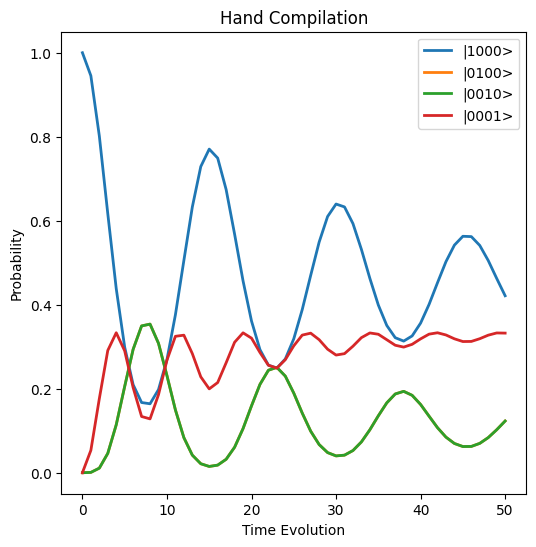

In [31]:
population1 = []
population2 = []
population3 = []
population4 = []

print(len(orig_result))
for i in range(len(orig_result)):
    population1.append(orig_result[i][1])
    population2.append(orig_result[i][2])
    population3.append(orig_result[i][4])
    population4.append(orig_result[i][8])

np.save("original_selected_outputs", [population1, population2, population3, population4])

tlist = range(len(all_qc)) #range(2) if testing
fig, ax = pyplot.subplots(1, 1, figsize=(6,6))
ax.plot(tlist, population1, linewidth=2, label='|1000>')
ax.plot(tlist, population2, linewidth=2, label='|0100>')
ax.plot(tlist, population3, linewidth=2, label='|0010>')
ax.plot(tlist, population4, linewidth=2, label='|0001>')
ax.set_title('Hand Compilation')
ax.set_xlabel('Time Evolution')
ax.set_ylabel('Probability')
ax.legend()

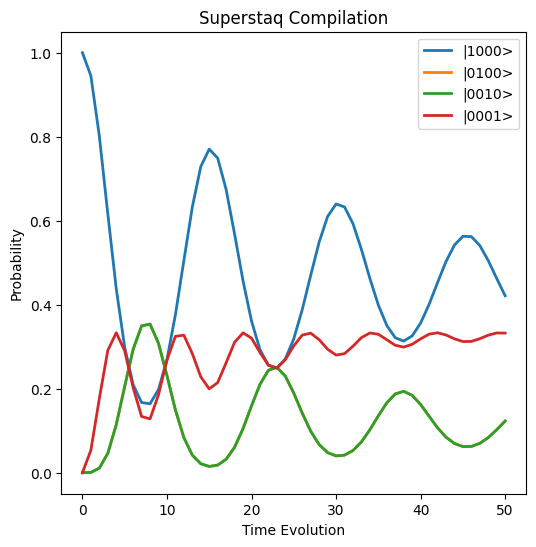

In [32]:
population1 = []
population2 = []
population3 = []
population4 = []

for i in range(len(orig_result)):
    population1.append(superstaq_no_mswap_result[i][1])
    population2.append(superstaq_no_mswap_result[i][2])
    population3.append(superstaq_no_mswap_result[i][4])
    population4.append(superstaq_no_mswap_result[i][8])

np.save("superstaq_selected_outputs", [population1, population2, population3, population4])


tlist = range(len(all_qc)) #range(2) if testing
fig, ax = pyplot.subplots(1, 1, figsize=(6,6))
ax.plot(tlist, population1, linewidth=2, label='|1000>')
ax.plot(tlist, population2, linewidth=2, label='|0100>')
ax.plot(tlist, population3, linewidth=2, label='|0010>')
ax.plot(tlist, population4, linewidth=2, label='|0001>')
ax.set_title('Superstaq Compilation')
ax.set_xlabel('Time Evolution')
ax.set_ylabel('Probability')
ax.legend()

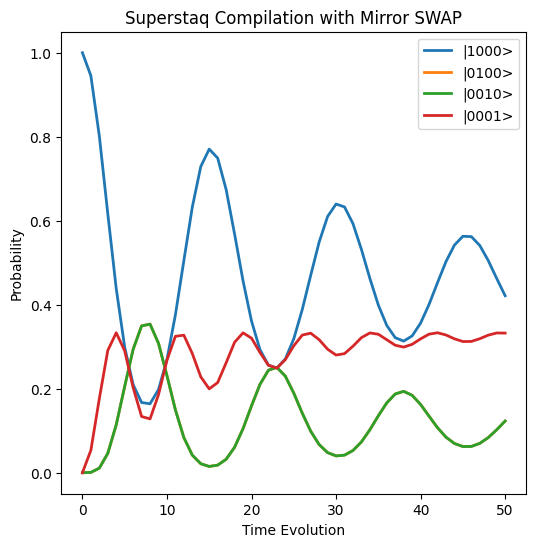

In [33]:
population1 = []
population2 = []
population3 = []
population4 = []

for i in range(len(orig_result)):
    population1.append(superstaq_mswap_result[i][1])
    population2.append(superstaq_mswap_result[i][2])
    population3.append(superstaq_mswap_result[i][4])
    population4.append(superstaq_mswap_result[i][8])

np.save("superstaq_mswap_selected_outputs", [population1, population2, population3, population4])

tlist = range(len(all_qc)) #range(2) if testing
fig, ax = pyplot.subplots(1, 1, figsize=(6,6))
ax.plot(tlist, population1, linewidth=2, label='|1000>')
ax.plot(tlist, population2, linewidth=2, label='|0100>')
ax.plot(tlist, population3, linewidth=2, label='|0010>')
ax.plot(tlist, population4, linewidth=2, label='|0001>')
ax.set_title('Superstaq Compilation with Mirror SWAP')
ax.set_xlabel('Time Evolution')
ax.set_ylabel('Probability')
ax.legend()

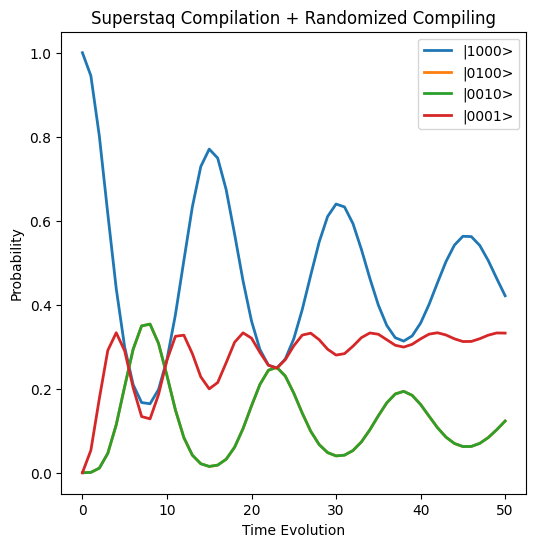

In [34]:
population1 = []
population2 = []
population3 = []
population4 = []

for i in range(len(orig_result)):
    population1.append(superstaq_rc_result[i][1])
    population2.append(superstaq_rc_result[i][2])
    population3.append(superstaq_rc_result[i][4])
    population4.append(superstaq_rc_result[i][8])

np.save("rc_selected_outputs", [population1, population2, population3, population4])

tlist = range(len(all_qc)) #range(2) if testing
fig, ax = pyplot.subplots(1, 1, figsize=(6,6))
ax.plot(tlist, population1, linewidth=2, label='|1000>')
ax.plot(tlist, population2, linewidth=2, label='|0100>')
ax.plot(tlist, population3, linewidth=2, label='|0010>')
ax.plot(tlist, population4, linewidth=2, label='|0001>')
ax.set_title('Superstaq Compilation + Randomized Compiling')
ax.set_xlabel('Time Evolution')
ax.set_ylabel('Probability')
ax.legend()